# Unsupervised ML

Unsupervised ML - a form of ML that finds patterns using unlabeled data (x).

Can be grouped as the following:
- Dimensionality reduction methods;
- Clustering: grouping data into distinct groups ("cluster") based on similarities in their features without using pre-labeled data as a guide. 
- Generative learning;

# Dimensionality reduction

Technique that aims to reduce the number of features while preserving as much information as possible. 

High-dimensional datasets - "curse of dimensionality".

There are different techniques:
- **Linear methods**: linearly project data onto a lower-dimensional space. 
  - **Projection**: projecting higher-dimensional plane onto a lower-dimensional linear plane
  - **PCA** (Principal Component Analysis)
  - **LDA** (Linear Discriminant Analysis)
  - **SVD**
  - **Truncated SVD** (Truncated Single Value Decomposition)
- **Non-linear methods (Manifold Learning)**: used when the subspace is twisting and turning in higher dimension.
  - **kernel PCA**
  - **t-distributed Stochastic Neighbor Embedding (t-SNE)**
  - **MDS** (Multidimensional Scaling)
  - **LLE**
  - **Autoencoders**: neural networks used for unsupervised representation learning and non-linear dimensionality reduction. They consist of an encoder that compresses data into a lower-dimensional representation and a decoder that reconstructs the data from the compressed representation.


Example of **Projection**

<img src="Media/projection.png" width=500>
<img src="Media/projection2.png" width=500>


## swiss roll

(1000, 3)
(1000,)


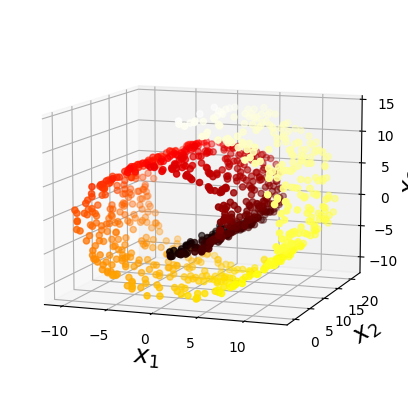

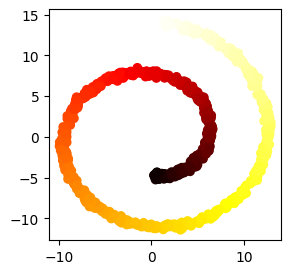

In [ ]:

from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import pandas as pd


X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
print(np.shape(X))
print(np.shape(t))

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()
plt.figure(figsize=(3,3))
plt.scatter(X[:,0], X[:,2], c=t, cmap=plt.cm.hot)


## Projection

## PCA

PCA is a linear transformation technique *based on projection* that aims to find a new set of orthogonal (perpendicular) variables (principal components), which are linear combinations of the original features, with aim that these principal components capture the maximum amount of variance in the data and can be used to reduce the dimensionality of the data. 

Applications:
- Visualisation of high-dimensional data;
- Dimensionality reduction for speeding up ML model training;
- Feature extraction

Terms:
- Principal component: a linear combination of the predictor variables. The aim is to maximise the variance of projects for each principal component
- Screeplot: a plot of the components' variance

(Step 1) So, first PCA would find a principal component that, projecting all data points onto itself, would capture the most variance. 

It does so by minimizing the total squared reconstruction error (basically, error of projection of each data point, or distance to that line).

So, this image - maximised variance, minimised error:

<img src="Media/pca3.png">

Here, less variance captured and the error is higher:

<img src="Media/pca4.png">

In the image below, it would be the red line that would maximize the variance:

<img src="Media/pca.png">

(Step 2) Now, find a second line orthogonal (perpendicular) to the first one that would have the maximum projected variance, once again (now it's the green line).

<img src="Media/pca2.png">

In PCA analysis, standardizing data is very important!

---

PLS is a supervised learning method that aims to find a new set of variables that maximize the covariance between the input features and the output variables. PLS is commonly used in regression and classification tasks when the number of input features is high relative to the number of observations, and the output variables are continuous or categorical.

In summary, PCA is an unsupervised method that aims to find the most important features that explain the variation in the data, while PLS is a supervised method that aims to find the features that are most relevant to predict the output variable.




#### PCA (Visual) 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

cancer = load_breast_cancer()
print( cancer.keys() )
print(cancer['target'])
print(len(cancer['target']))
print(list(cancer['target']).count(0)) # Malignant is 0

print(cancer['DESCR'])

df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Instead of StandardScaler, we could have used MinMaxScaler
scaler = StandardScaler()
scaler.fit(df)

scaled_data = scaler.transform(df)
scaled_data



array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
pca = PCA(
	n_components=2
	)

pca.fit(scaled_data)


PCA(n_components=2)

In [ ]:
x_pca = pca.transform(scaled_data)
# or could have used x_pca = pca.fit_transform(scaled_data)

print(scaled_data.shape)
print(x_pca.shape)

(569, 30)
(569, 2)


In [ ]:
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [ ]:
df_pca = pd.DataFrame({
	'Component 1': x_pca[:,0],
	'Component 2': x_pca[:,1],
	'Target': cancer['target']
})

df_pca['Labels'] = df_pca['Target'].apply( lambda x: 'Malignant' if x==0 else 'Benign' )
df_pca

,Component 1,Component 2,Target,Labels
0,9.192837,1.948583,0,Malignant
1,2.387802,-3.768172,0,Malignant
2,5.733896,-1.075174,0,Malignant
3,7.122953,10.275589,0,Malignant
4,3.935302,-1.948072,0,Malignant
...,...,...,...,...
564,6.439315,-3.576817,0,Malignant
565,3.793382,-3.584048,0,Malignant
566,1.256179,-1.902297,0,Malignant
567,10.374794,1.672010,0,Malignant


Text(0, 0.5, 'Second principle component')

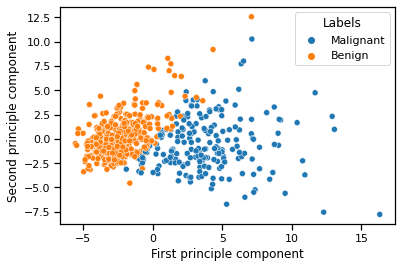

In [ ]:
sns.set_context('notebook')
sns.scatterplot( x=df_pca['Component 1'], y=df_pca['Component 2'], hue=df_pca['Labels'] )
plt.xlabel('First principle component')
plt.ylabel('Second principle component')


#### PCA (Visual) 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df = sns.load_dataset('iris')
# In this dataset, we have 4 features (dimensions)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[['setosa']
 ['setosa']
 ['setosa']
 ['setosa']
 ['setosa']]
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]
   principal component 1  principal component 2 species
0              -2.264703               0.480027  setosa
1              -2.080961              -0.674134  setosa
2              -2.364229              -0.341908  setosa
3              -2.299384              -0.597395  setosa
4              -2.389842               0.646835  setosa


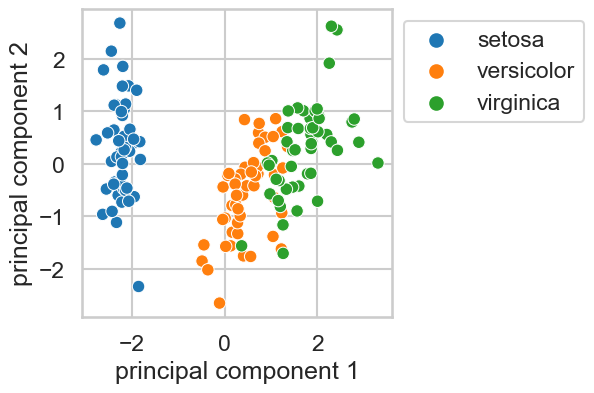

Total variance explained by 2 components: 95.81%
 - Component 0: 72.96% of variance
 - Component 1: 22.85% of variance
The rest of the variance (4.19%) is explained by the third and fourth components.


In [ ]:
# Let's separate features and target into different variables
x = df.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = df.loc[:, ['species']].values

print(x[:5])
print(y[:5])

# Standardise the features
x = StandardScaler().fit_transform(x)
print(x[:5])

# PCA projection to 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
print(principalComponents[:5])
df_pca = pd.DataFrame(data=principalComponents, columns = ['principal component 1', 'principal component 2'])
df_pca
df_pca2 = pd.concat( [df_pca, df[['species']]], axis=1 )

print( df_pca2.head() )

plt.figure(figsize=(4,4))
sns.set_style('whitegrid')
sns.scatterplot(
	x=df_pca2['principal component 1'],
	y=df_pca2['principal component 2'], 
	hue=df_pca2['species']
	)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# Explained variance - how much information (variance) 
# can be attributed to each of the principal components

# Variance of the first and then second component
expvar = pca.explained_variance_ratio_ 
print(f"Total variance explained by 2 components: {sum(expvar)*100:.2f}%")
for i,j in enumerate(expvar):
	print(f" - Component {i}: {j*100:.2f}% of variance")

print(f"The rest of the variance ({100 - sum(expvar)*100:.2f}%) is explained by the third and fourth components.")

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
  species
0  setosa
1  setosa
2  setosa
3  setosa
4  setosa
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]
[[-0.63070293  0.10757791]
 [-0.62290494 -0.10425983]
 [-0.6695204  -0.05141706]
 [-0.65415276 -0.10288487]
 [-0.64878806  0.13348758]]
   principal component 1  principal component 2 species
0              -0.630703               0.107578  setosa
1              -0.622905              -0.104260  setosa
2              -0.669520              -0.051417  setosa
3       

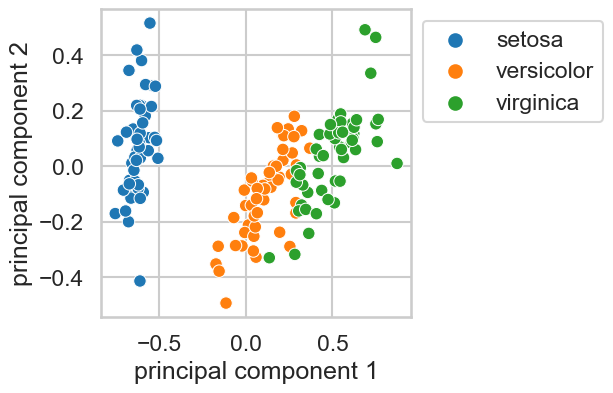

Total variance explained by 2 components: 95.89%
 - Component 0: 84.14% of variance
 - Component 1: 11.75% of variance
The rest of the variance (4.11%) is explained by the third and fourth components.


In [ ]:
# Let's separate features and target into different variables
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df[['species']]

print(x[:5])
print(y[:5])

# Standardise the features
x = MinMaxScaler().fit_transform(x)
print(x[:5])

# PCA projection to 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
print(principalComponents[:5])
df_pca = pd.DataFrame(data=principalComponents, columns = ['principal component 1', 'principal component 2'])
df_pca
df_pca2 = pd.concat( [df_pca, df[['species']]], axis=1 )

print( df_pca2.head() )

plt.figure(figsize=(4,4))
sns.set_style('whitegrid')
sns.scatterplot(
	x=df_pca2['principal component 1'],
	y=df_pca2['principal component 2'], 
	hue=df_pca2['species']
	)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# Explained variance - how much information (variance) 
# can be attributed to each of the principal components

# Variance of the first and then second component
expvar = pca.explained_variance_ratio_ 
print(f"Total variance explained by 2 components: {sum(expvar)*100:.2f}%")
for i,j in enumerate(expvar):
	print(f" - Component {i}: {j*100:.2f}% of variance")

print(f"The rest of the variance ({100 - sum(expvar)*100:.2f}%) is explained by the third and fourth components.")

#### PCA (dimred) 1

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
print(dir(fetch_openml))

['__annotations__', '__builtins__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


In [ ]:
mnist = fetch_openml('MNIST_784')



In [ ]:
# 70k images, 784 features (28x28)
print( mnist.data.shape )
# 1 label
print( mnist.target.shape )


(70000, 784)
(70000,)


In [ ]:
# Do the 80-20 train-test split

train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)


In [ ]:
# Standardise the data for PCA
scaler = StandardScaler()
# fit on training set only
scaler.fit(train_img)
# apply transform to both the training set and test set
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)


In [ ]:
# apply PCA

# make an instance of the model
pca = PCA(0.95) # choose the minimum number of principal components such that 95% of variance is retained
# fit PCA on the training set
pca.fit(train_img)
# Find out how many components were chosen
pca.n_components_


327

In [ ]:
# Apply transform to both training and test set
train_img, test_img = pca.transform(train_img), pca.transform(test_img)


In [ ]:
train_img.shape


(60000, 327)

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(solver="lbfgs")
logisticRegr.fit(train_img, train_lbl)


c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

In [ ]:
logisticRegr.predict(test_img[:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

In [ ]:
# Measure performance
from sklearn.metrics import accuracy_score

accuracy_score(logisticRegr.predict(test_img), test_lbl)



0.9201

#### ex (swiss roll)

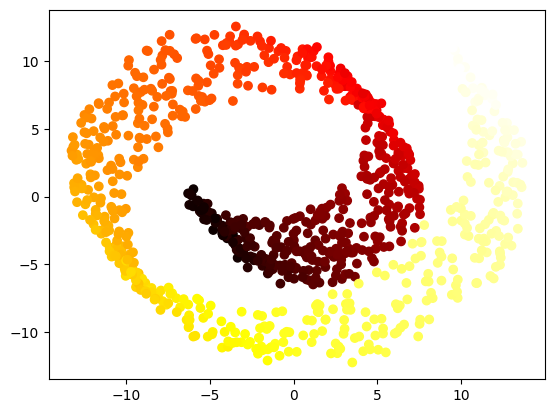

In [ ]:
"""
normal PCA
NO data scaling
"""

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
df_pca = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2'])

plt.scatter(df_pca['pc1'], df_pca['pc2'], c=t, cmap=plt.cm.hot)


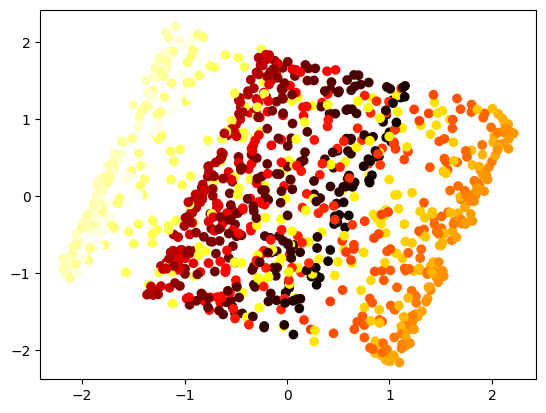

In [ ]:
"""
normal PCA
data scaling
"""
x_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)
df_pca = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2'])

plt.scatter(df_pca['pc1'], df_pca['pc2'], c=t, cmap=plt.cm.hot)


### kernel PCA

Very memory-intense.


#### ex 1 (swiss roll; can also be resolved with normal PCA)

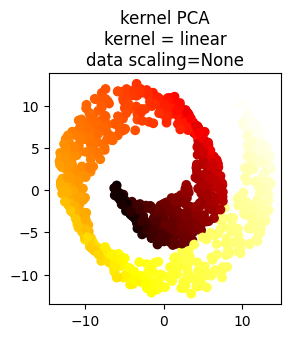

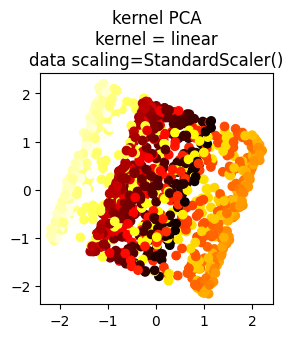

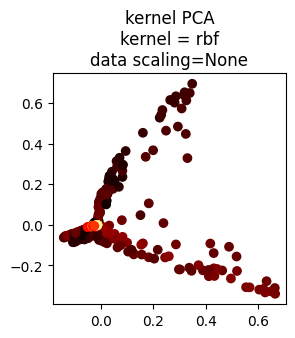

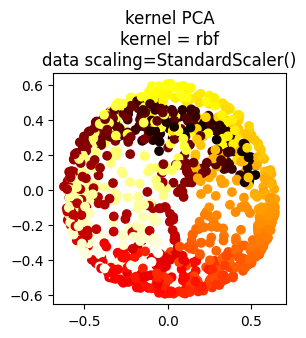

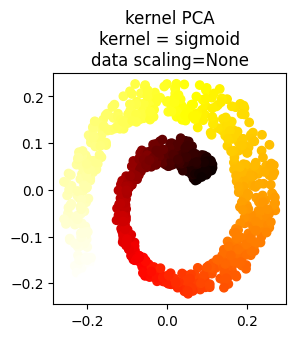

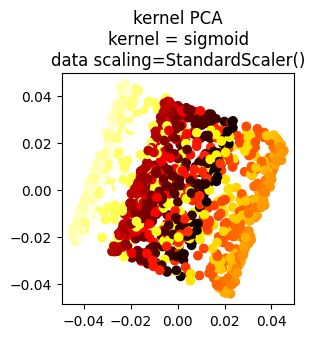

In [ ]:
"""
kernel PCA

NOTE: KernelPCA with kernel='linear' is equivalent to normal PCA.

"""


def kernelpca(kernel, scaling):
    if not scaling:
        x_scaled = X
    else:
        x_scaled = StandardScaler().fit_transform(X)
    # x_scaled = X
    if kernel == 'sigmoid':
        pca = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.001, coef0=1)
    else:
        pca = KernelPCA(n_components=2, kernel=kernel)
    principalComponents = pca.fit_transform(x_scaled)
    df_pca = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2'])
    plt.figure(figsize=(3,3))
    plt.scatter(df_pca['pc1'], df_pca['pc2'], c=t, cmap=plt.cm.hot)
    plt.title(f"kernel PCA\nkernel = {kernel}\ndata scaling={scaling}")
    plt.show()

for i in ['linear', 'rbf', 'sigmoid']:
    for j in [None, StandardScaler()]:
        kernelpca(i, j)


### LLE

#### ex1 (unrolled swiss roll)

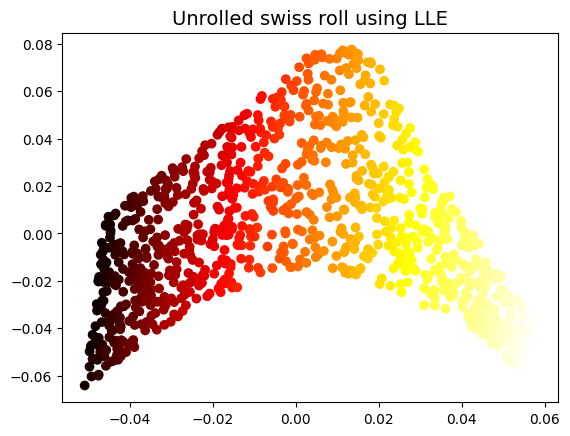

In [ ]:
"""
LLE
NO scaling
"""
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)

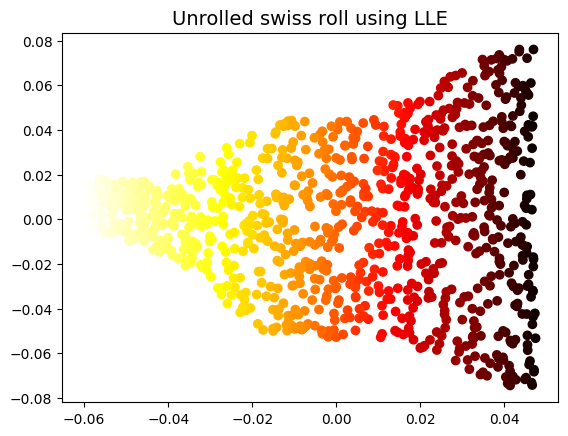

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

x_scaled = StandardScaler().fit_transform(X)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(x_scaled)

plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)

## SVD

In [1]:
import numpy as np
# Sample data
X = np.random.rand(100, 5)
# Center the data
X_centered = X - X.mean(axis=0)
# Perform SVD
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
# Reduce dimensionality to two dimensions using the first two
X_svd = np.matmul(U[:, :2], np.diag(S[:2]))

## t-SNE

> WARNING! t-SNE can run for a very long time, especially with the increasing size of a dataset!

In [2]:
import numpy as np
from sklearn.manifold import TSNE
# Sample data
X = np.random.rand(100, 5)
# Create a t-SNE instance and fit_transform the data
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

## Autoencoders

In [4]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
# Sample data
X = np.random.rand(100, 5)

# Define the autoencoder architecture
input_layer = Input(shape=(5,))
encoded = Dense(2, activation='relu')(input_layer)
decoded = Dense(5, activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
# Train the autoencoder
autoencoder.fit(X, X, epochs=50, batch_size=32)
# Obtain the lower-dimensional representation (encoder part of the autoencoder)
encoder = Model(input_layer, encoded)
X_autoencoder = encoder.predict(X)




Epoch 1/50

4/4 [==============================] - 1s 5ms/step - loss: 0.0933
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0929
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0926
Epoch 4/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0923
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0921
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0918
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0916
Epoch 8/50
4/4 [==============================] - 0s 0s/step - loss: 0.0913
Epoch 9/50
4/4 [==============================] - 0s 0s/step - loss: 0.0911
Epoch 10/50
4/4 [==============================] - 0s 0s/step - loss: 0.0908
Epoch 11/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0906
Epoch 12/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0903
Epoch 13/50
4/4 [==============================] - 0s 5ms/step - loss: 0

# Clustering



Kleinberg theorem: three properties which should be possessed by a correct clustering algorithm. Author proves in this theorem that the algorithm possessing all three properties at once doesn't exist. 

1. Scale-Invariance: If we transform the data so that everything is stretched out equally in all directions, then the clustering result shouldn’t change.
2. Consistency: If we stretch the data so that the distances between clusters increase and/or the distances within clusters decrease, then the clustering result shouldn’t change.
3. Richness: The clustering function should theoretically be able to produce any arbitrary partition/clustering of datapoints (in the absence of knowing the pairwise distance between any two points)

Clustering methods:
- K-means
- DBSCAN
- Hierarchical clustering: builds a hierarchy of clusters by recursively dividing or merging data points based on a similarity measure. Unlike other clustering methods that produce a single partitioning of the data, hierarchical clustering creates a tree-like structure of clusters, known as a dendrogram. This dendrogram provides insights into the hierarchical relationships between data points and clusters;
- Spectral clustering transforms the data into a lower-dimensional space using the Laplacian
graph and then performs clustering in this transformed space. It’s especially useful for clustering
data with complex structures and is not limited by the shape of clusters.
- Ordering Points To Identify Clustering Structure (OPTICS) is a density-based clustering
algorithm similar to DBSCAN. It creates an ordering of data points based on their densityconnectedness.
Unlike DBSCAN, it produces a reachability plot, which helps in visualizing
varying densities and clusters of different sizes.
- Fuzzy c-means (FCM) is a clustering algorithm that extends the traditional K-means algorithm
by allowing data points to belong to multiple clusters with varying degrees of membership.
Unlike K-means, where each data point belongs to a single cluster exclusively, FCM assigns
each data point a membership value for each cluster, representing the degree of belongingness
to that cluster. This makes FCM a fuzzy clustering algorithm, where points can have partial
membership in multiple clusters.



## K-Means Clustering

Uses:
- Finding clusters in data;
- Can be used in image compression

Advantages:
- It is easy to interpret;
- Effective;
- Time complexity is generally linear when the data can be clustered;

Disadvantages:
- Cluster shape and density: As K-Means assigns an instance to a cluster by the linear distance to the centroid, it can behave not well when the clusters have very different sizes, densities, or non-spherical shapes. 
- If the data does not have clusters, then time complexity could become exponential.
- Number of clusters: You need to specify the number of clusters and need to run the algorithm several times to avoid sub-optimal solutions. Choosing the optimal number of clusters can be subjective and impact the results; 
- Sensitive to initialization: K-means’ performance can vary based on the initial centroids
- Outliers: Outliers can significantly influence cluster centroids and affect results

<u>Terms</u>:
- Cluster: a group of datapoints that are similar across their features;
- K: hyperparameter; the number of clusters;
- Inertia: a metric of clustering performance; the sum of squared distances of samples to their closest cluster center.

<img src="Media/ML/k-means.png" width=500>

---

<u>Algorithm</u>:

> In a gist, this algorithm works by iteratively assigning data points to clusters and updating cluster centroids to minimise the sum of squared distances between points and their respective centroids. The steps are initialisation > assignment > update > repeat:

1) **Initialisation**: Randomly initialise (place) $k$ different points (cluster centroids) at random; $\mu_{K} \text{ = cluster centroid K: } \mu_{1}, \mu_{2}, ... , \mu_{K}$
2) Then, repeat the following until stopping criteria are met (e.g. clusters do not change their positions; or a specified number of iterations):
    - **Assignment**: Algorithm goes through the data points one-by-one, assigning each to the closest cluster centroid (based on Euclidean distance);
    - **Update**: recalculate centroids based on the mean of data points in each cluster for each feature:
      - For every cluster (number of clusters = $k$):
        - For each axis / feature:
          - The algorithm recomputes the centroid by computing the mean of the data points that are the closest to that cluster (in this axis) and moves the centroid to that newly-calculated point of mean for each axis / feature of each datapoint. 
    - Place the centroid at this calculated location;
3) Now data are clustered into $k$ clusters.

> If each example $x$ is a vector of 5 numbers, then each cluster centroid $\mu_{K}$ is also going to be a vector of 5 numbers. IOW, the dimension of $\mu_{K}$ matches the dimension of the examples. 

<img src="Media/kmeans2.png">

> Red / black crosses in the image above are **cluster centroids**.

It is possible that the randomly-initialised centroids in the algorithm described above converge at a local optimum that is not the global optimum. To prevent this, we could introduce additional step 4: having finished steps 1-3, we have a clustering attempt number 1. Sum variation within each cluster, record it for this attempt, and then repeat clustering steps 1-3 for many times, at the end of which choose the parameters for clusters from the best-performing clustering attempt using **inertia** - the mean squared distance between each instance and its closest centroid.

<img src="Media/ML/kmeans2.jpg" width=700>

---

**Assumptions**: K-means assumes that:
- **clusters are spherical and have roughly equal sizes** (cluster have similar diameters and contain roughly the same number of data points). K-means may struggle to cluster groups that have irregular shapes, elongated structures, or densities; 
- **the variance of the data points within each cluster is roughly the same**. 
- **all features have the same importance** and influence on the clustering process. *This can be problematic if some features are more important for clustering than others*; 
- clusters are **independent and non-overlapping**. In reality, data points may belong to multiple clusters or exhibit complex patterns that K-means cannot capture;
- K-means requires you to specify the number of clusters (k) in advance. This can be a challenge if the true number of clusters is not known or if the data doesn’t naturally divide into distinct clusters;
- the clusters have similar densities. If some clusters are denser than others, K-means may struggle to correctly assign data points;
- Feature scaling: Like most other cluster algorithms, it is required to scale the features to ensure one does not influence the model more than others.

---

<u>Finding the correct number of clusters</u>


The optimal k parameter can be figured out by the following methods:
- By eyeballing from the plot;
- **Elbow method**: 
  - just try different K and for each record loss (e.g. WCSS - within-cluster sum of squares). Plot loss versus K and choose K at which the loss changes the most and then plateaus afterwards;
  - The right K is often ambiguous. However, don't choose K just to minimise cost J.
  - <img src="Media/elbow_method.png" width=400>
- **Silhouette plot**: 
  - compute the silhouette score, which is mean silhouette coefficient for all instances (for each instance, silhouete coefficient = $(b-a)/ max(a,b)$, where $a$ - mean distance to the other instances in the same cluster and $b$ - mean distance to the instances of the closest cluster.)
  - Calculate silhouette score for different number of clusters $k$ and can choose the $k$ corresponding to the highest silhouette score.
  - <img src="Media/silhouette.png" width=500>
- By logic or common sense applied to a specific problem, e.g. shirt sizes can come in S, M, and L:
  - <img src="Media/ML/kmeans.jpg" width=700>

---

Some code:

```py
# For elbow method
# Calculate inertia
kmeans.inertia_
# inertia but negative so that we can respect the "great is better" rule
kmeans.score(X)

# for silhouette plot method
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_) # compute this for different number of clusters k
```

---






<img src="Media/ML/kmeans3.jpg" width=700>

### Algorithm by hand

In pseudocode, the K-means algorithm is as follows:

``` python
# Initialize centroids
# K is the number of clusters
centroids = kMeans_init_centroids(X, K)

for iter in range(iterations):
    # Cluster assignment step: 
    # Assign each data point to the closest centroid. 
    # idx[i] corresponds to the index of the centroid 
    # assigned to example i
    idx = find_closest_centroids(X, centroids)

    # Move centroid step: 
    # Compute means based on centroid assignments
    centroids = compute_centroids(X, idx, K)
```



In [8]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
"""
Let's create array X with 300 training examples and 2 features for each
""";
X = np.array([[ 1.84207953,  4.6075716 ],
       [ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ],
       [ 2.90401653,  4.61220411],
       [ 3.23197916,  4.93989405],
       [ 1.24792268,  4.93267846],
       [ 1.97619886,  4.43489674],
       [ 2.23454135,  5.05547168],
       [ 2.98340757,  4.84046406],
       [ 2.97970391,  4.80671081],
       [ 2.11496411,  5.37373587],
       [ 2.12169543,  5.20854212],
       [ 1.5143529 ,  4.77003303],
       [ 2.16979227,  5.27435354],
       [ 0.41852373,  4.88312522],
       [ 2.47053695,  4.80418944],
       [ 4.06069132,  4.99503862],
       [ 3.00708934,  4.67897758],
       [ 0.66632346,  4.87187949],
       [ 3.1621865 ,  4.83658301],
       [ 0.51155258,  4.91052923],
       [ 3.1342801 ,  4.96178114],
       [ 2.04974595,  5.6241395 ],
       [ 0.66582785,  5.24399257],
       [ 1.01732013,  4.84473647],
       [ 2.17893568,  5.29758701],
       [ 2.85962615,  5.26041997],
       [ 1.30882588,  5.30158701],
       [ 0.99253246,  5.01567424],
       [ 1.40372638,  4.57527684],
       [ 2.66046572,  5.19623848],
       [ 2.79995882,  5.11526323],
       [ 2.06995345,  4.6846713 ],
       [ 3.29765181,  5.59205535],
       [ 1.8929766 ,  4.89043209],
       [ 2.55983064,  5.26397756],
       [ 1.15354031,  4.67866717],
       [ 2.25150754,  5.4450031 ],
       [ 2.20960296,  4.91469264],
       [ 1.59141937,  4.83212573],
       [ 1.67838038,  5.26903822],
       [ 2.59148642,  4.92593394],
       [ 2.80996442,  5.53849899],
       [ 0.95311627,  5.58037108],
       [ 1.51775276,  5.03836638],
       [ 3.23114248,  5.78429665],
       [ 2.54180011,  4.81098738],
       [ 3.81422865,  4.73526796],
       [ 1.68495829,  4.59643553],
       [ 2.17777173,  4.86154019],
       [ 1.8173328 ,  5.13333907],
       [ 1.85776553,  4.86962414],
       [ 3.03084301,  5.24057582],
       [ 2.92658295,  5.09667923],
       [ 3.43493543,  5.34080741],
       [ 3.20367116,  4.85924759],
       [ 0.10511804,  4.72916344],
       [ 1.40597916,  5.06636822],
       [ 2.24185052,  4.9244617 ],
       [ 1.36678395,  5.26161095],
       [ 1.70725482,  4.04231479],
       [ 1.91909566,  5.57848447],
       [ 1.60156731,  4.64453012],
       [ 0.37963437,  5.26194729],
       [ 2.02134502,  4.41267445],
       [ 1.12036737,  5.20880747],
       [ 2.26901428,  4.61818883],
       [-0.24512713,  5.74019237],
       [ 2.12857843,  5.01149793],
       [ 1.84419981,  5.03153948],
       [ 2.32558253,  4.74867962],
       [ 1.52334113,  4.87916159],
       [ 1.02285128,  5.0105065 ],
       [ 1.85382737,  5.00752482],
       [ 2.20321658,  4.94516379],
       [ 1.20099981,  4.57829763],
       [ 1.02062703,  4.62991119],
       [ 1.60493227,  5.13663139],
       [ 0.47647355,  5.13535977],
       [ 0.3639172 ,  4.73332823],
       [ 0.31319845,  5.54694644],
       [ 2.28664839,  5.0076699 ],
       [ 2.15460139,  5.46282959],
       [ 2.05288518,  4.77958559],
       [ 4.88804332,  5.50670795],
       [ 2.40304747,  5.08147326],
       [ 2.56869453,  5.20687886],
       [ 1.82975993,  4.59657288],
       [ 0.54845223,  5.0267298 ],
       [ 3.17109619,  5.5946452 ],
       [ 3.04202069,  5.00758373],
       [ 2.40427775,  5.0258707 ],
       [ 0.17783466,  5.29765032],
       [ 2.61428678,  5.22287414],
       [ 2.30097798,  4.97235844],
       [ 3.90779317,  5.09464676],
       [ 2.05670542,  5.23391326],
       [ 1.38133497,  5.00194962],
       [ 1.16074178,  4.67727927],
       [ 1.72818199,  5.36028437],
       [ 3.20360621,  0.7222149 ],
       [ 3.06192918,  1.5719211 ],
       [ 4.01714917,  1.16070647],
       [ 1.40260822,  1.08726536],
       [ 4.08164951,  0.87200343],
       [ 3.15273081,  0.98155871],
       [ 3.45186351,  0.42784083],
       [ 3.85384314,  0.7920479 ],
       [ 1.57449255,  1.34811126],
       [ 4.72372078,  0.62044136],
       [ 2.87961084,  0.75413741],
       [ 0.96791348,  1.16166819],
       [ 1.53178107,  1.10054852],
       [ 4.13835915,  1.24780979],
       [ 3.16109021,  1.29422893],
       [ 2.95177039,  0.89583143],
       [ 3.27844295,  1.75043926],
       [ 2.1270185 ,  0.95672042],
       [ 3.32648885,  1.28019066],
       [ 2.54371489,  0.95732716],
       [ 3.233947  ,  1.08202324],
       [ 4.43152976,  0.54041   ],
       [ 3.56478625,  1.11764714],
       [ 4.25588482,  0.90643957],
       [ 4.05386581,  0.53291862],
       [ 3.08970176,  1.08814448],
       [ 2.84734459,  0.26759253],
       [ 3.63586049,  1.12160194],
       [ 1.95538864,  1.32156857],
       [ 2.88384005,  0.80454506],
       [ 3.48444387,  1.13551448],
       [ 3.49798412,  1.10046402],
       [ 2.45575934,  0.78904654],
       [ 3.2038001 ,  1.02728075],
       [ 3.00677254,  0.62519128],
       [ 1.96547974,  1.2173076 ],
       [ 2.17989333,  1.30879831],
       [ 2.61207029,  0.99076856],
       [ 3.95549912,  0.83269299],
       [ 3.64846482,  1.62849697],
       [ 4.18450011,  0.45356203],
       [ 3.7875723 ,  1.45442904],
       [ 3.30063655,  1.28107588],
       [ 3.02836363,  1.35635189],
       [ 3.18412176,  1.41410799],
       [ 4.16911897,  0.20581038],
       [ 3.24024211,  1.14876237],
       [ 3.91596068,  1.01225774],
       [ 2.96979716,  1.01210306],
       [ 1.12993856,  0.77085284],
       [ 2.71730799,  0.48697555],
       [ 3.1189017 ,  0.69438336],
       [ 2.4051802 ,  1.11778123],
       [ 2.95818429,  1.01887096],
       [ 1.65456309,  1.18631175],
       [ 2.39775807,  1.24721387],
       [ 2.28409305,  0.64865469],
       [ 2.79588724,  0.99526664],
       [ 3.41156277,  1.1596363 ],
       [ 3.50663521,  0.73878104],
       [ 3.93616029,  1.46202934],
       [ 3.90206657,  1.27778751],
       [ 2.61036396,  0.88027602],
       [ 4.37271861,  1.02914092],
       [ 3.08349136,  1.19632644],
       [ 2.1159935 ,  0.7930365 ],
       [ 2.15653404,  0.40358861],
       [ 2.14491101,  1.13582399],
       [ 1.84935524,  1.02232644],
       [ 4.1590816 ,  0.61720733],
       [ 2.76494499,  1.43148951],
       [ 3.90561153,  1.16575315],
       [ 2.54071672,  0.98392516],
       [ 4.27783068,  1.1801368 ],
       [ 3.31058167,  1.03124461],
       [ 2.15520661,  0.80696562],
       [ 3.71363659,  0.45813208],
       [ 3.54010186,  0.86446135],
       [ 1.60519991,  1.1098053 ],
       [ 1.75164337,  0.68853536],
       [ 3.12405123,  0.67821757],
       [ 2.37198785,  1.42789607],
       [ 2.53446019,  1.21562081],
       [ 3.6834465 ,  1.22834538],
       [ 3.2670134 ,  0.32056676],
       [ 3.94159139,  0.82577438],
       [ 3.2645514 ,  1.3836869 ],
       [ 4.30471138,  1.10725995],
       [ 2.68499376,  0.35344943],
       [ 3.12635184,  1.2806893 ],
       [ 2.94294356,  1.02825076],
       [ 3.11876541,  1.33285459],
       [ 2.02358978,  0.44771614],
       [ 3.62202931,  1.28643763],
       [ 2.42865879,  0.86499285],
       [ 2.09517296,  1.14010491],
       [ 5.29239452,  0.36873298],
       [ 2.07291709,  1.16763851],
       [ 0.94623208,  0.24522253],
       [ 2.73911908,  1.10072284],
       [ 6.00506534,  2.72784171],
       [ 6.05696411,  2.94970433],
       [ 6.77012767,  3.21411422],
       [ 5.64034678,  2.69385282],
       [ 5.63325403,  2.99002339],
       [ 6.17443157,  3.29026488],
       [ 7.24694794,  2.96877424],
       [ 5.58162906,  3.33510375],
       [ 5.3627205 ,  3.14681192],
       [ 4.70775773,  2.78710869],
       [ 7.42892098,  3.4667949 ],
       [ 6.64107248,  3.05998738],
       [ 6.37473652,  2.56253059],
       [ 7.28780324,  2.75179885],
       [ 6.20295231,  2.67856179],
       [ 5.38736041,  2.26737346],
       [ 5.6673103 ,  2.96477867],
       [ 6.59702155,  3.07082376],
       [ 7.75660559,  3.15604465],
       [ 6.63262745,  3.14799183],
       [ 5.76634959,  3.14271707],
       [ 5.99423154,  2.75707858],
       [ 6.37870407,  2.65022321],
       [ 5.74036233,  3.10391306],
       [ 4.61652442,  2.79320715],
       [ 5.33533999,  3.03928694],
       [ 5.37293912,  2.81684776],
       [ 5.03611162,  2.92486087],
       [ 5.52908677,  3.33681576],
       [ 6.05086942,  2.80702594],
       [ 5.132009  ,  2.19812195],
       [ 5.73284945,  2.87738132],
       [ 6.78110732,  3.05676866],
       [ 6.44834449,  3.35299225],
       [ 6.39941482,  2.89756948],
       [ 5.86067925,  2.99577129],
       [ 6.44765183,  3.16560945],
       [ 5.36708111,  3.19502552],
       [ 5.88735565,  3.34615566],
       [ 3.96162465,  2.72025046],
       [ 6.28438193,  3.17360643],
       [ 4.20584789,  2.81647368],
       [ 5.32615581,  3.03314047],
       [ 7.17135204,  3.4122727 ],
       [ 7.4949275 ,  2.84018754],
       [ 7.39807241,  3.48487031],
       [ 5.02432984,  2.98683179],
       [ 5.31712478,  2.81741356],
       [ 5.87655237,  3.21661109],
       [ 6.03762833,  2.68303512],
       [ 5.91280273,  2.85631938],
       [ 6.69451358,  2.89056083],
       [ 6.01017978,  2.72401338],
       [ 6.92721968,  3.19960026],
       [ 6.33559522,  3.30864291],
       [ 6.24257071,  2.79179269],
       [ 5.57812294,  3.24766016],
       [ 6.40773863,  2.67554951],
       [ 6.80029526,  3.17579578],
       [ 7.21684033,  2.72896575],
       [ 6.5110074 ,  2.72731907],
       [ 4.60630534,  3.329458  ],
       [ 7.65503226,  2.87095628],
       [ 5.50295759,  2.62924634],
       [ 6.63060699,  3.01502301],
       [ 3.45928006,  2.68478445],
       [ 8.20339815,  2.41693495],
       [ 4.95679428,  2.89776297],
       [ 5.37052667,  2.44954813],
       [ 5.69797866,  2.94977132],
       [ 6.27376271,  2.24256036],
       [ 5.05274526,  2.75692163],
       [ 6.88575584,  2.88845269],
       [ 4.1877442 ,  2.89283463],
       [ 5.97510328,  3.0259191 ],
       [ 6.09457129,  2.61867975],
       [ 5.72395697,  3.04454219],
       [ 4.37249767,  3.05488217],
       [ 6.29206262,  2.77573856],
       [ 5.14533035,  4.13225692],
       [ 6.5870565 ,  3.37508345],
       [ 5.78769095,  3.29255127],
       [ 6.72798098,  3.0043983 ],
       [ 6.64078939,  2.41068839],
       [ 6.23228878,  2.72850902],
       [ 6.21772724,  2.80994633],
       [ 5.78116301,  3.07987787],
       [ 6.62447253,  2.74453743],
       [ 5.19590823,  3.06972937],
       [ 5.87177181,  3.2551773 ],
       [ 5.89562099,  2.89843977],
       [ 5.6175432 ,  2.5975071 ],
       [ 5.63176103,  3.04758747],
       [ 5.50258659,  3.11869075],
       [ 6.48212628,  2.5508514 ],
       [ 7.30278708,  3.38015979],
       [ 6.99198434,  2.98706729],
       [ 4.8255341 ,  2.77961664],
       [ 6.11768055,  2.85475655],
       [ 0.94048944,  5.71556802]])
X.shape

(300, 2)

In [3]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example. 

    For each datapoint, the centroid membership is assigned
    by taking the centroid for which the sum of squared differences 
    of values for all the features of K and the datapoint is the minimum.

    (K - centroid)
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]
    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)
    # START ITERATION
    # for each datapoint in X
    for i in range(X.shape[0]):
        # create list of sums of squared differences for all K's
        check_list_K = []
        # for each K
        for j in range(K):
            # calculate sum of squared differences
            L2 = sum( (X[i] - centroids[j])**2 )
            check_list_K.append(L2)
        # get id of the minimum L2
        final_id = np.argmin(check_list_K)
        # for datapoint i, assign the "final_id" which is index of the K for which L2 is the minimum
        idx[i] = final_id
        
    return idx

# UNQ_C2
# GRADED FUNCTION: compute_centroids

def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    ### START CODE HERE ###
    data_for_each_K = {i:[] for i in range(K)}
    for i in range(len(idx)):
        datapoint_index = i
        datapoint_K = idx[i]
        data_for_each_K[datapoint_K].append(datapoint_index)
    for i in range(K):
        K_sliced_data = data_for_each_K[i]
        centroids[i] = X[K_sliced_data].mean(axis=0)
        
        
    ### END CODE HERE ## 
    
    return centroids

In [20]:
"""
Just one iteration
""";


In [21]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

In [22]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


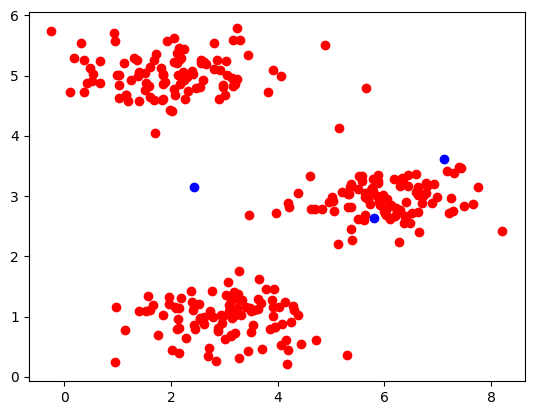

In [23]:
plt.plot(X[:,0], X[:,1], 'or')
plt.plot(centroids[:,0], centroids[:,1], 'ob')

In [24]:
"""
many iterations
""";

In [28]:
# You do not need to implement anything for this part

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # # Optionally plot progress
        # if plot_progress:
        #     plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
        #     previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

initial_centroids = kMeans_init_centroids(X, K)
max_iters = 10
# initial_centroids = np.array([[3,3],[6,2],[8,5]])
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

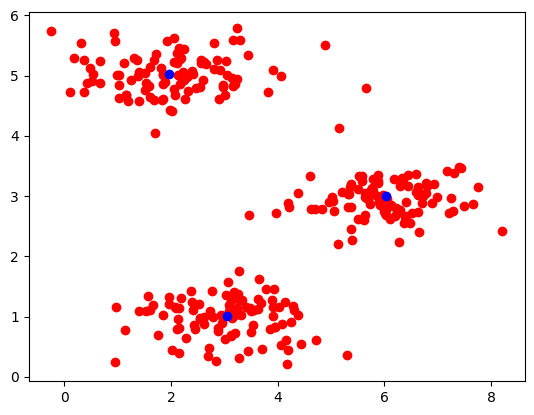

In [29]:
plt.plot(X[:,0], X[:,1], 'or')
plt.plot(centroids[:,0], centroids[:,1], 'ob')

### Example 1

Centers:  [[ 72.48829882 231.63722325]
 [ 34.01831145 152.64067983]
 [ 76.75014072 177.73050337]]


c:\Users\Data Science\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Data Science\AppData\Local\Temp\ipykernel_33492\1114502045.py:34: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<Axes: xlabel='Width', ylabel='Length'>

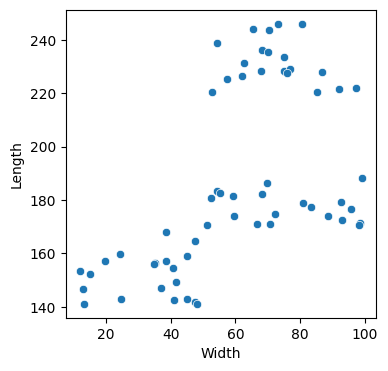

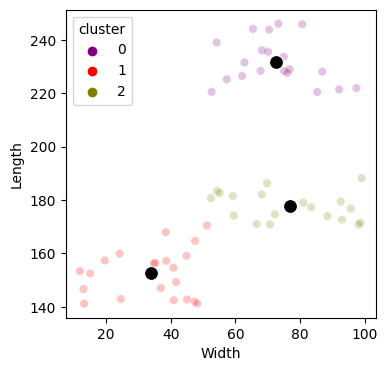

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans

df = pd.DataFrame({
	'Width': [ random.uniform(10,49) for i in range(20) ]   + [ random.uniform(50,100) for i in range(20) ]  + [random.uniform(50,100) for i in range(20)],
	'Length': [ random.uniform(140,169) for i in range(20)] + [ random.uniform(170,189) for i in range(20) ] + [random.uniform(220,250) for i in range(20) ]
})

plt.figure(figsize=(4,4))
sns.scatterplot( x=df['Width'], y=df['Length'] )

df.head()

df_cp = df.copy()
kmeans = KMeans(n_clusters = 3).fit(df_cp)
### cluster labels
df_cp['cluster'] = kmeans.labels_
### cluster centers
centers = kmeans.cluster_centers_
print("Centers: ", centers)

plt.figure(figsize=(4,4))
sns.scatterplot( x=df_cp['Width'], y=df_cp['Length'], hue=df_cp['cluster'], palette=sns.color_palette('brg', n_colors=3), alpha=0.23)

df_cp_centers = pd.DataFrame({
	'Width': centers[:,0],
	'Length': centers[:,1]
})

sns.scatterplot(
	x=df_cp_centers['Width'], y=df_cp_centers['Length'], 
	color='black', 
	# style=df_cp_centers['markers'], 
	s=100,
	legend=False,
	palette=sns.color_palette('brg', n_colors=3)
	)


,Width,Length
0,38.161401,146.317578
1,25.377146,148.724228
2,17.978231,164.671875
3,15.780424,155.179776
4,46.276362,158.907308


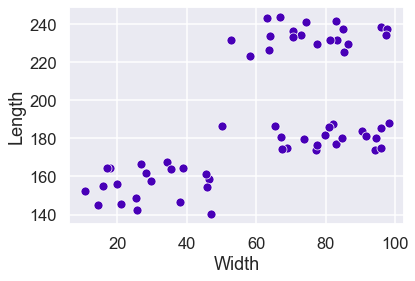

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans

df = pd.DataFrame({
	'Width': [ random.uniform(10,49) for i in range(20) ]   + [ random.uniform(50,100) for i in range(20) ]  + [random.uniform(50,100) for i in range(20)],
	'Length': [ random.uniform(140,169) for i in range(20)] + [ random.uniform(170,189) for i in range(20) ] + [random.uniform(220,250) for i in range(20) ]
})

sns.scatterplot( x=df['Width'], y=df['Length'] )

df.head()

[[ 62.23448606 190.32044356]]
       Width      Length  cluster
0  38.161401  146.317578        0
1  25.377146  148.724228        0
2  17.978231  164.671875        0
3  15.780424  155.179776        0
4  46.276362  158.907308        0
[[ 30.20646959 157.32359691]
 [ 79.48034109 208.08797637]]
       Width      Length  cluster
0  38.161401  146.317578        0
1  25.377146  148.724228        0
2  17.978231  164.671875        0
3  15.780424  155.179776        0
4  46.276362  158.907308        0
[[ 29.20749662 155.86964658]
 [ 76.50238155 234.39621238]
 [ 80.99358001 180.69547171]]
       Width      Length  cluster
0  38.161401  146.317578        0
1  25.377146  148.724228        0
2  17.978231  164.671875        0
3  15.780424  155.179776        0
4  46.276362  158.907308        0
[[ 29.20749662 155.86964658]
 [ 65.69791646 234.9316235 ]
 [ 80.99358001 180.69547171]
 [ 87.30684665 233.86080125]]
       Width      Length  cluster
0  38.161401  146.317578        0
1  25.377146  148.724228  

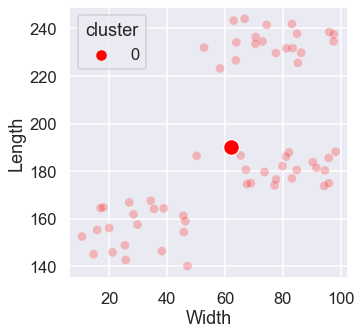

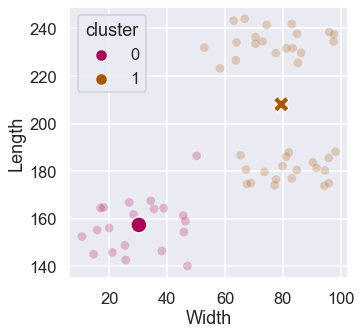

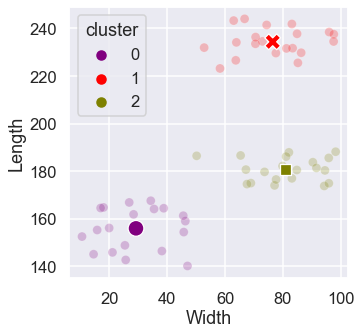

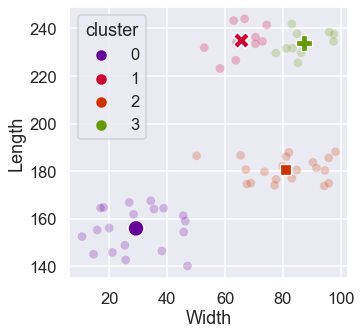

In [ ]:

def plot_K_centers(df, K):
	df_cp = df.copy()

	kmeans = KMeans(n_clusters=K).fit(df_cp)

	# cluster labels
	df_cp['cluster'] = kmeans.labels_

	# cluster centers
	centers = kmeans.cluster_centers_
	print(centers)

	plt.figure(figsize=(5,5))
	sns.scatterplot(
		x=df_cp['Width'], y=df_cp['Length'], 
		hue=df_cp['cluster'], 
		# palette=['red', 'blue', 'green']
		palette=sns.color_palette('brg', n_colors=K),
		alpha=0.23
		)


	print( df_cp.head() )

	df_cp_centers = pd.DataFrame({
		'Width': centers[:,0],
		'Length': centers[:,1],
	})
	lista = ['^', 's', 'X', '*' ]
	df_cp_centers['markers'] = lista[:K]

	# markers = ['^', 's', 'X' ]
	# for i,j in enumerate(centers):
	# 	print(i, j[0], j[1], j[2])
	# 	plt.plot( j[0], j[1], marker=markers[i], color='black', markersize=10 )

	# plt.legend(['Cluster 0 (red)', 'Cluster 1 (Blue)', 'Cluster 2 (Green)'])

	sns.scatterplot(
		x=df_cp_centers['Width'], y=df_cp_centers['Length'], 
		# color='black', 
		style=df_cp_centers['markers'], 
		s=250,
		legend=False,
		hue=df_cp_centers['markers'],
		palette=sns.color_palette('brg', n_colors=K)
		)

plot_K_centers(df, 1)
plot_K_centers(df, 2)
plot_K_centers(df, 3)
plot_K_centers(df, 4)

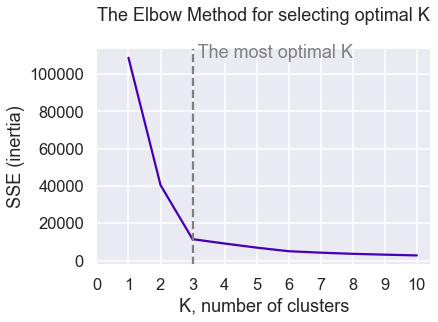

In [ ]:
# Let's determine the most optimal K by using the elbow method

df_cp = df.copy()

sse = {} # Sum of squared error
for i in range(1, 11):
	kmeans = KMeans(n_clusters=i).fit(df_cp)
	sse[i] = kmeans.inertia_

plt.figure()
sns.lineplot( x=sse.keys(), y=sse.values() )
plt.xticks(range(11));
plt.ylabel('SSE (inertia)')
plt.xlabel('K, number of clusters')
plt.axvline(3, color='grey', ls='--')
plt.text(3, max(sse.values()), ' The most optimal K', color='grey')
plt.title('The Elbow Method for selecting optimal K\n');


### Example 2

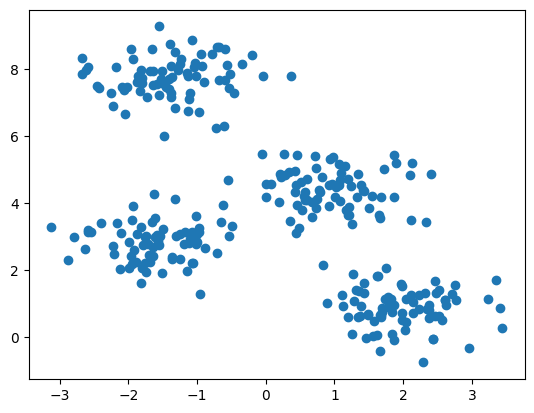

In [3]:
# Import necessary libraries and prep data with 4 clusters
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(
    n_samples=300, 
    centers=4, 
    cluster_std=0.60, 
    random_state=0
)

plt.scatter(X[:,0], X[:,1])

c:\Users\evgen\.conda\envs\data-science\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


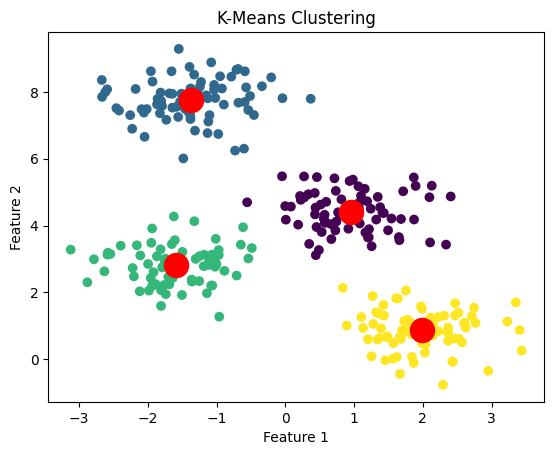

In [4]:
# Initialize K-Means with 4 clusters and plot cluster centers
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X)
cluster_centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

## DBSCAN

This algorithm defines clusters as continuous regions of high density. 

Advantages:
- Works well with **clusters of varying shapes and sizes** - dense clusters, sparse clusters, and clusters separated by areas of lower density;
- DBSCAN can effectively **handle noisy data** and classify outliers as noise points
- Can discover clusters of **varying sizes and densities** within the same dataset;
- Requires **minimal parameter tuning** compared to other methods

Disadvantages:
- It is very important to choose correctly the parameters epsilon and min_samples. Choosing inappropriate values for these parameters can lead to undesirable results, such as overfitting, underfitting, or identifying noise as clusters;
- Sensitive to data scaling;
- May struggle with clusters of varying densities
- Is susceptible to high-dimensional data (the curse of dimensionality). 


---

<u>Algorithm</u>

*In A Nutshell: DBSCAN clusters data points based on their density. It defines dense regions as clusters and identifies outliers as noise points. Points within a specified distance (epsilon) and a minimum number of neighbors (min_samples) are considered part of the same cluster.*

> DBSCAN identifies clusters by considering two main parameters: the radius (epsilon) that defines the neighborhood of a data point and the minimum number of data points (min_samples) required to form a dense region. 
>
> Core points: points that have at least `min_samples` data points within its epsilon neighborhood.
>
> Border points: points that is within the epsilon neighborhood of a core point but does not have enough neighbors to be considered a core point itself.
>
> Noise point: data points that are not core or border points. 

DBSCAN starts by selecting an arbitrary data point, expanding its neighborhood, and recursively
growing a cluster. This process continues until no more data points can be added to the cluster, at
which point a new cluster is formed. This process is then repeated until all data points have been
classified into clusters or marked as noise.

- For each instance, the algorithm counts how many other instances are at a small distance (epsilon) from it, in an instance's epsilon-neighborhood
- If an instance has at least X instances in its epsilon-neighborhood, then it is considered a core instance (as one located in a dense region)
- All instances in the core instance neighborhood belong to the same cluster. 



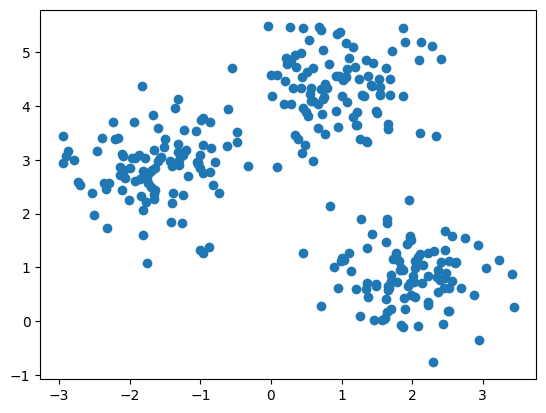

In [42]:
# Import the needed libraries and prep the dataset
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=0)
plt.scatter(X[:,0], X[:,1])

[ 0  1  0  2  2  2  1  0  2  2  1  1  1  0  1  2  0  0  2  1  2  0  1  0
  2  2  0  2  1  1  2  0  0  1  1  2  1 -1  0  1  2  1  0  1  1  2  1 -1
  2  1  2  1  2  2  1  0  0  2  2  0  1  1  0  2  1  2  0  1  0  1  2  2
  2  2  1  0  1  2  0  0  2  0  1  0  0  0  1  2  0  0  2  1  2  0  1  1
  0  1  2  0  1  2  0  1  0  0  2  0  1  1  0  2  0  0  2  2  0  0  1  1
  1  2  1  1  1  2  1  1  1  2  2  2  0  2  2  1  2  0  2  2  1  0  1  0
  2  2  0  2  2  1  0  2  0  1  2  2  1  1  0  1  0  0  1  0  2  0  0  0
  0  2  1  0  2  1  1 -1  0  1  0  0  1  2  0  0  0  0  1  2  0  2  0  0
  1  1  2  0  1  2  0  2  1  2  0  2  1  2  0  2  0  1  0  0  2  1  1  1
  1  0 -1  1  0 -1  1  1  0  2  2  0 -1  2  0  1  1  0  1  2 -1 -1  0  0
  1  2  2 -1  2  1  2  2  0  1  1  0  1  1  2  0  1  2  0  0  2  0  2  2
 -1  2  0  1  1  1  1  0  0  0  0  0  2  2  1  0  0  1  1 -1  2  1  2  2
  1  1  2  2  2 -1  0  0  2  1  0  0]


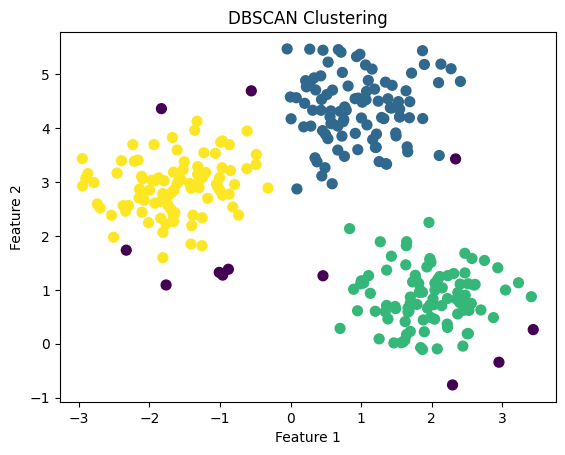

In [43]:
# Create DBSCAN model, fit it, and plot clusters
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)
print(labels)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

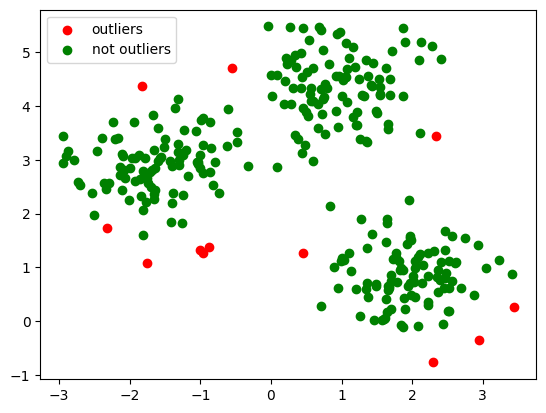

In [55]:
# a_data, a_labels = [], []
# b_data, b_labels = [], []
a_data, b_data = [], []
for i, j in zip(X, labels):
    if j == -1:
        a_data.append([i[0], i[1]])
    else:
        b_data.append([i[0], i[1]])
a_data = np.array(a_data)
b_data = np.array(b_data)

plt.scatter(a_data[:,0], a_data[:,1], color='red')
plt.scatter(b_data[:,0], b_data[:,1], color='green')
plt.legend(['outliers', 'not outliers'])

## Performance metrics

Evaluation metrics for clustering algorithms:
1. **Internal Evaluation Metrics (without ground truth knowledge / labels)**:
   - **Inertia** (Within-Cluster Sum of Squares): 
     - Measures the sum of squared differences between each data point and its cluster's centroid; 
     - Lower inertia means that the clusters are well separated and are compact. Nevertheless, a very low inertia might indicate overfitting, where the number of clusters is too high.
   - **Silhouette Coefficient / Score**:
     - Evaluates coherence inside of the clusters and the separation between clusters. 
     - The metric varies from -1 (poor clustering) to 1 (well defined clusters with good separation and cohesion)
   - **Davies-Bouldin Index**
   - **Calinski-Harabasz Index** (Variance Ratio Criterion)
2. **External Evaluation Metrics (with ground truth knowledge / labels)**
   - **Rand Index (RI)**:
     - Compares the coincidence of labels with the predictions of clusters;
     - The index has a range of 0 (random clustering) to 1 (perfect agreement);
   - **Adjusted Rand Index (ARI)**:
     - Corrects for chance agreement, thus providing a more robust performance assessment;
     - ARI is often preferred to RI in different clustering tasks;
   - **Normalised Mutual Information (NMI)**
     - This quantifies the amount of information that’s shared between true class assignments and predicted clusters, normalized to account for cluster size.

> https://www.geeksforgeeks.org/clustering-metrics/



In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import mutual_info_score, adjusted_rand_score
# Example using a built-in dataset (e.g., Iris dataset)
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [2]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.labels_

c:\Users\evgen\.conda\envs\data-science\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

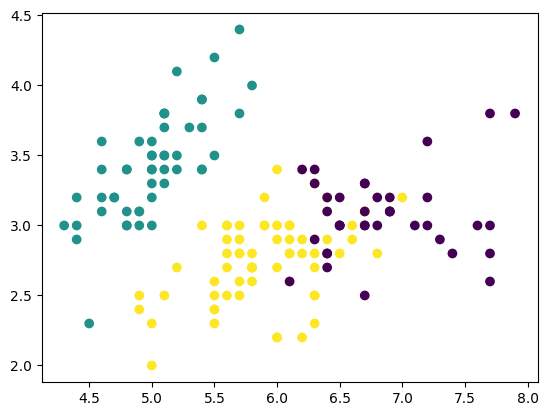

In [5]:
import matplotlib.pyplot as plt


### Visualisation 3d data in 2 dimensions, using only 2 first variables
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)

In [17]:
print("Internal Evaluation Metrics\n---------------------------")
silhouette = silhouette_score(X, kmeans.labels_)
db_index = davies_bouldin_score(X, kmeans.labels_)
ch_index = calinski_harabasz_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

print("\nExternal Evaluation Metrics\n----------------------------")
ari = adjusted_rand_score(iris.target, kmeans.labels_)
mi = mutual_info_score(iris.target, kmeans.labels_)
print(f"Adjusted Rand Index: {ari:.2f}")
print(f"Mutual Information (MI): {mi:.2f}")


Internal Evaluation Metrics
---------------------------
Silhouette Score: 0.55
Davies-Bouldin Index: 0.66
Calinski-Harabasz Index: 561.63

External Evaluation Metrics
----------------------------
Adjusted Rand Index: 0.73
Mutual Information (MI): 0.83


# Anomaly detection

> Anomaly detection algorithms learn on normal dataset (of normal events) 
> 
> to then predict abnormal events. 

Uses:
- Fraud detection;
- Manufacturing, to check for defects;
- Monitor computers in a data center; features = memory use, CPU load, number of disk accesses, CPU load, network traffic

Techniques:
- Density estimation: estimates probability of $x$ (any data point to test) to be seen in a dataset. Uses normal distribution.

Anomaly detection vs supervised learning:

Anomaly detection strives to detect whether the data point is different (in any way) from the data points in your training set, while supervised learning classifies the data point into a known category.

| Anomaly detection | Supervised learning |
| - | - |
| Very small number of positive examples (y=1) (0-20 is common) and a large number of negative (y=0) examples. E.g., 10,000 negative data points and 0-15 negative data points. | Large number of positive and negative examples |
| Is more appropriate to use anomaly detection (than supervised learning) **when the anomaly can change**, and the future anomalies may look nothing like any of the anomalous examples we've seen so far. E.g. <ul><li>Fraud detection (fraudulent transaction)</li><li>Manufacturing - finding new previously unseen defects in manufacturing (e.g. aircraft engines)</li><li>Monitoring machines in a data center</li></ul> | E.g.: <ul><li>Email spam classification</li><li>Manufacturing - finding known, previously seen defects</li><li>Weather predictions (sunny / rainy / etc.)</li><li>Disease classification</li></ul> |

Works best if we have data without labels. Or if we have data that can be labeled, but we don't have any data on anomaly:
- E.g. anomaly detection - you have 10,000 data points of computers functioning well, and no data from computers malfunctioning;
- Nevertheless, If you have 10,000 data points for both categories, better use supervised learning.

---

Feature selection:
- Feature selection in anomaly detection is very important - more important than in supervised learning!
- **Try to choose / make features gaussian**; if you have non-gaussian distributed features, make them gaussian by transformations, e.g. log transform; 

    <img src="Media/ML/gaussian-features.png">

- Error analysis: 

---

<img src="Media/ML/anomaly-detection-1.jpg">

<img src="Media/ML/anomaly-detection-2.jpg">

<img src="Media/ML/anomaly-detection-3.jpg">

---

$$\mu = \cfrac{1}{m} \sum^{m}_{i=1} x_{i}$$

$$\sigma^{2} = \cfrac{1}{m} \sum^{m}_{i=1} (x_{i} - \mu)^{2}$$

Train mu and sigma based on training data. 

Then, calculate p(x) of a test data and, based on probability threshold, say if this number is too extreme or not.

For one feature only (x), the example is given below. 

0.24175505236135097


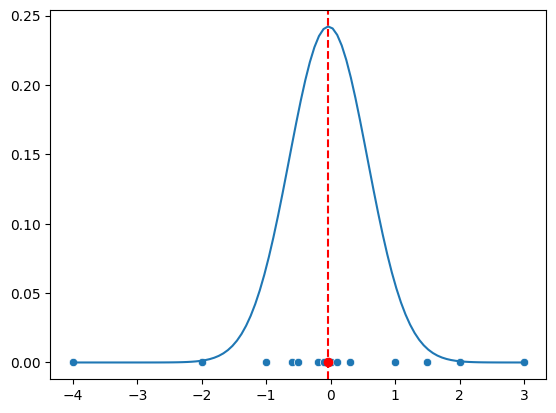

In [34]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns

def mu(x:list):
    return sum(x) / len(x)

def sigma(x):
    mean = sum(x) / len(x)
    summ = 0
    for i in x:
        summ += (i - mean)**2
    sigma = summ / len(x)
    return sigma

def gaussian(x, sigma, mu):
    x = x
    # Mean
    mean = mu
    # SD
    SD = sigma**0.5
    # return SD
    leftPart = 1 / ( SD * (2*np.pi)**0.5 )
    rightPart = np.e**( -((x-mean)**2) / 2*(SD**2) )
    return leftPart*rightPart

x = [-4, -2, -1, -0.6, -0.5, -0.2, -0.1, 0, 0.1, 0.3, 1, 1.5, 2, 3]
x_min, x_max = min(x), max(x)
x_mu = mu(x)
x_sigma = sigma(x)

sns.scatterplot( x=x, y=0)
plt.scatter( 
    x=mu(x), y=0, color='red', 
    # s=5, lw=5
)

x_gauss = np.linspace(x_min, x_max, 100)
f_x_gauss = gaussian(
    x_gauss,
    x_sigma, 
    x_mu
)

sns.lineplot( x=x_gauss, y=f_x_gauss)
plt.axvline(mu(x), ls='--', color='red')

print(gaussian(0, x_sigma, x_mu))

for more features, :

each example has n features. 

$$p(\vec{x}) = \prod^{n}_{j=1} p(x_{j}; \mu_{j}, \sigma^{2}_{j})$$

, where $p(x_{j}; \mu_{j}, \sigma^{2}_{j})$ simply comes from the normal equation.

Anomaly detection algorithm: 

j is a feature being considered at any moment.

Epsilon is a probability threshold that can be picked. $y = \begin{cases} 1 & \text{ if } p(x) < \epsilon \text{ (anomaly) } \\ 0 & \text{ if } p(x) \ge \epsilon \text{ (normal) }  \end{cases}$


<img src="Media/ML/anomaly-detection.jpg">




---

In practice, we can train this unsupervised anomaly detection algorithm on unlabeled data of non-anomalous data points. Then, perform validation and testing on mixed datasets consisting of non-anomalous and anomalous data points. Val set can also aid at tuning the epsilon parameter.

It is also common that since the anomalies are very rare, you can have only validation set and no test set.

If we have very few examples of anomalous data points, we can put these data points into validation set and / or test set.


## Example 1

**To perform anomaly detection, you will first need to fit a model to the data’s distribution**.

* Given a training set $\{x^{(1)}, ..., x^{(m)}\}$ you want to estimate the Gaussian distribution for each
of the features $x_i$. 

* Recall that the Gaussian distribution is given by

   $$ p(x ; \mu,\sigma ^2) = \frac{1}{\sqrt{2 \pi \sigma ^2}}\exp^{ - \frac{(x - \mu)^2}{2 \sigma ^2} }$$

   where $\mu$ is the mean and $\sigma^2$ is the variance.
   
* For each feature $i = 1\ldots n$, you need to find parameters $\mu_i$ and $\sigma_i^2$ that fit the data in the $i$-th dimension $\{x_i^{(1)}, ..., x_i^{(m)}\}$ (the $i$-th dimension of each example).


**Then, we choose the value of epsilon, based on F1-score for each**:

In this section, you will complete the code in `select_threshold` to select the threshold $\varepsilon$ using the $F_1$ score on a cross validation set.

* For this, we will use a cross validation set
$\{(x_{\rm cv}^{(1)}, y_{\rm cv}^{(1)}),\ldots, (x_{\rm cv}^{(m_{\rm cv})}, y_{\rm cv}^{(m_{\rm cv})})\}$, where the label $y=1$ corresponds to an anomalous example, and $y=0$ corresponds to a normal example. 
* For each cross validation example, we will compute $p(x_{\rm cv}^{(i)})$. The vector of all of these probabilities $p(x_{\rm cv}^{(1)}), \ldots, p(x_{\rm cv}^{(m_{\rm cv})})$ is passed to `select_threshold` in the vector `p_val`. 
* The corresponding labels $y_{\rm cv}^{(1)}, \ldots, y_{\rm cv}^{(m_{\rm cv})}$ are passed to the same function in the vector `y_val`.



In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
X_train = np.random.uniform(10, 20, 200).reshape(100,2)
print(X_train.shape)

X_train[:5]


(100, 2)


array([[15.42754484, 17.49594719],
       [19.89981355, 10.06415455],
       [18.25208765, 19.85686458],
       [18.39369449, 17.25143963],
       [10.58396812, 10.5199882 ]])

In [12]:
X_train = np.array([[13.04681517, 14.74115241],
       [13.40852019, 13.7632696 ],
       [14.19591481, 15.85318113],
       [14.91470077, 16.17425987],
       [13.57669961, 14.04284944],
       [13.92240251, 13.40646894],
       [12.82213164, 14.22318782],
       [15.67636615, 15.89169137],
       [16.16287532, 16.20299807],
       [12.66645095, 14.89908374],
       [13.98454962, 12.95800822],
       [14.06146043, 14.54908874],
       [13.38988671, 15.56202142],
       [13.39350475, 15.62698794],
       [13.97900926, 13.28061494],
       [14.16791259, 14.46583829],
       [13.96176145, 14.75182421],
       [14.45899735, 15.07018563],
       [14.58476372, 15.82743424],
       [12.07427074, 13.0671109 ],
       [13.5491294 , 15.53827677],
       [13.98625042, 14.78776304],
       [14.96991942, 16.51830493],
       [14.25576597, 15.29427277],
       [15.33425   , 16.12469989],
       [15.6350487 , 16.49094477],
       [13.62081292, 15.45947525],
       [14.81548485, 15.33956527],
       [14.59318973, 14.61238106],
       [14.48906755, 15.64087368],
       [15.52704801, 14.63568031],
       [13.97506707, 14.76531533],
       [12.95364954, 14.82328512],
       [12.88787444, 15.0760781 ],
       [16.02178961, 16.25746992],
       [14.92629271, 16.29725072],
       [12.465594  , 14.18321212],
       [14.08466278, 14.44192203],
       [14.53717523, 14.24224248],
       [14.22250852, 15.42386188],
       [14.51908496, 13.99871699],
       [13.11971434, 14.66081846],
       [14.51088894, 15.30465149],
       [14.18262426, 15.39388968],
       [14.71651845, 15.73369667],
       [13.834547  , 16.17138034],
       [16.00076179, 14.6923297 ],
       [14.12702715, 15.91462775],
       [13.84578547, 14.34139349],
       [15.4142611 , 16.24243182],
       [13.25273727, 15.00861364],
       [13.66840226, 14.35886036],
       [13.77534774, 14.73808512],
       [14.12582343, 14.92980923],
       [14.54724604, 15.63339445],
       [14.15258077, 14.53622697],
       [14.12648161, 15.34467591],
       [14.26324658, 14.98556918],
       [14.77324332, 15.25299474],
       [14.20969934, 16.14572569],
       [13.26065515, 15.48016214],
       [14.25273351, 15.03134361],
       [12.92124447, 13.1932154 ],
       [13.85243129, 13.33213111],
       [13.968568  , 13.19821237],
       [13.25206982, 15.3684639 ],
       [13.70449634, 13.21431302],
       [14.50874721, 15.46051652],
       [15.69042696, 16.48168852],
       [12.95598192, 12.43703006],
       [13.59312604, 14.84189903],
       [15.12874639, 17.14981223],
       [14.26705037, 15.67551974],
       [15.66145055, 14.81146451],
       [14.33962673, 15.49202298],
       [14.27617655, 14.70590693],
       [14.86049072, 15.59000779],
       [14.1041448 , 15.18050456],
       [15.98828286, 15.62105187],
       [13.47473583, 15.59307142],
       [13.77637601, 14.99194427],
       [12.82770875, 15.67136907],
       [13.67165486, 15.11954159],
       [15.38704284, 15.56936935],
       [15.54320934, 15.5154315 ],
       [13.85306094, 15.60672437],
       [13.62525246, 14.45209463],
       [15.01577844, 14.91664093],
       [13.83645753, 15.24940725],
       [14.22694439, 14.34798436],
       [13.23742625, 14.61058751],
       [13.38482919, 14.7331933 ],
       [13.87130103, 14.97399469],
       [12.39445847, 14.64448217],
       [14.32186558, 14.52890629],
       [15.82965092, 15.71619455],
       [15.80177302, 16.01808914],
       [14.697512  , 14.11198749],
       [14.70598657, 16.46040295],
       [13.5915686 , 14.91975097],
       [12.29984539, 14.77119468],
       [13.39904748, 16.11912911],
       [15.1311287 , 15.9003113 ],
       [15.38581198, 15.71453967],
       [15.45487422, 15.44042242],
       [13.74951531, 15.26803136],
       [15.69914333, 16.05595815],
       [14.80580491, 14.33258926],
       [15.17222943, 16.70624398],
       [11.24915512, 15.13295896],
       [13.88773907, 14.48548132],
       [15.32587018, 16.58524064],
       [12.97517063, 15.16056771],
       [14.07427781, 17.21973519],
       [14.18202564, 17.83351945],
       [12.23970014, 14.72866834],
       [14.82555961, 15.94500685],
       [13.09763368, 16.230365  ],
       [13.85758878, 15.03526838],
       [15.52502523, 16.78653608],
       [15.31499528, 14.56835428],
       [14.03034874, 15.66336188],
       [14.42312995, 14.94109335],
       [13.63615119, 14.96411634],
       [14.53477943, 13.35611764],
       [14.61566224, 14.15241035],
       [13.08085544, 14.02845941],
       [14.93928678, 14.54933746],
       [16.02712663, 15.7096583 ],
       [14.31925037, 15.11762658],
       [14.86153307, 14.28458412],
       [14.01432033, 16.77971266],
       [13.4076547 , 14.60041191],
       [13.07959732, 14.19389917],
       [12.68820689, 13.81109597],
       [14.19232757, 15.36498179],
       [14.86589365, 14.4713879 ],
       [13.39350298, 14.34389893],
       [13.58659143, 14.39148496],
       [13.1021929 , 14.3760326 ],
       [14.54176556, 16.37233995],
       [14.25602703, 15.0423495 ],
       [16.1875476 , 16.36145254],
       [13.63292363, 13.62886894],
       [14.65349335, 14.97649221],
       [12.619118  , 16.77214314],
       [13.0342773 , 14.25689091],
       [10.85940052, 14.47914434],
       [12.93486071, 14.60746678],
       [13.99226766, 14.96212808],
       [12.57248704, 15.1972735 ],
       [15.68266703, 16.22123922],
       [13.21258152, 14.35182737],
       [13.98975002, 14.5244565 ],
       [13.46626641, 13.65765529],
       [13.13166385, 15.79882584],
       [14.35439255, 15.02329268],
       [13.55329411, 13.73218769],
       [12.98628429, 14.80983707],
       [14.37264883, 14.95148191],
       [13.5886905 , 15.19778175],
       [12.26002252, 15.61364104],
       [13.66602494, 16.44517365],
       [14.34554567, 15.44883765],
       [14.60667498, 15.77655361],
       [14.15369524, 16.57440586],
       [14.04899502, 14.39078838],
       [14.06857464, 14.62364257],
       [15.88890082, 16.33705609],
       [13.9760142 , 15.84206443],
       [10.88221341, 13.46166188],
       [13.90920312, 14.97657577],
       [12.36776146, 15.14204982],
       [15.16765639, 15.51933857],
       [15.33769517, 14.23319145],
       [13.5505769 , 15.73044061],
       [13.57918657, 15.47264441],
       [14.2447909 , 15.08509119],
       [15.33086297, 15.71142599],
       [15.91714893, 15.15651433],
       [13.85421254, 15.32125758],
       [14.08736591, 14.30728374],
       [12.63610997, 15.65066102],
       [14.36282756, 13.87195409],
       [14.50066606, 14.61759025],
       [13.96984547, 16.17341605],
       [15.13133128, 15.28924849],
       [15.15300231, 14.0136283 ],
       [13.31011939, 14.39060275],
       [14.25712173, 14.29705004],
       [13.71613135, 13.5273347 ],
       [15.70094058, 15.99611429],
       [13.38943515, 14.36513423],
       [14.14088666, 13.97440554],
       [14.8448705 , 14.01695106],
       [12.7048959 , 14.27293037],
       [14.95353525, 14.73218902],
       [14.28114118, 14.61262378],
       [13.06799074, 14.83286345],
       [13.602797  , 12.20295199],
       [12.68816488, 15.81141681],
       [13.88291728, 14.1180837 ],
       [14.01648222, 14.33509982],
       [15.3657655 , 15.82610475],
       [13.57764756, 14.88045533],
       [13.39189242, 14.34497756],
       [13.6936209 , 15.9218994 ],
       [12.87853442, 13.2017448 ],
       [13.69916365, 15.4180007 ],
       [14.01609081, 15.82165925],
       [14.58996505, 16.38090675],
       [15.00784342, 15.50954334],
       [14.05950746, 13.75788684],
       [14.46114684, 13.34425721],
       [14.64474777, 15.03905866],
       [13.85478898, 15.86614261],
       [14.28141751, 14.02340696],
       [14.93304554, 14.32639552],
       [13.76930807, 16.5131053 ],
       [13.44404345, 15.07922663],
       [14.03179286, 14.40986664],
       [13.8194684 , 15.58676798],
       [16.50656641, 15.22029747],
       [12.20423231, 14.32106065],
       [14.88192989, 16.36162231],
       [15.16031   , 15.14972042],
       [11.78759609, 14.55034169],
       [12.88388298, 14.57250348],
       [13.62023706, 16.4236925 ],
       [14.53049363, 15.44664319],
       [12.64616608, 15.10838775],
       [15.54763373, 16.43238821],
       [14.40076998, 15.21258204],
       [15.2105839 , 14.93547994],
       [15.0617344 , 15.11740666],
       [14.8621459 , 14.70177771],
       [15.40451989, 15.34490712],
       [13.79430575, 14.68727111],
       [14.63390272, 16.30082804],
       [12.45687581, 15.54617986],
       [13.99759773, 16.73594542],
       [12.93253734, 12.62389977],
       [13.70345191, 14.71480993],
       [13.12395594, 15.44848981],
       [13.81691009, 14.09233539],
       [13.02489337, 14.25050252],
       [14.53425535, 15.76596517],
       [13.2518626 , 16.32252319],
       [13.23657555, 15.3369661 ],
       [12.12971316, 12.66688846],
       [14.38088736, 16.03087165],
       [15.98239722, 15.52399453],
       [13.7510791 , 13.64320738],
       [13.35730012, 13.42431786],
       [13.0855909 , 14.86775906],
       [13.61173302, 14.86806414],
       [15.17761737, 14.15354188],
       [14.15456589, 15.28746898],
       [13.22531906, 13.9598547 ],
       [13.94151501, 14.76023193],
       [15.39066479, 15.71412823],
       [13.17642607, 13.67395694],
       [13.38689006, 14.66536822],
       [15.15888821, 14.78211271],
       [14.55599225, 14.04946256],
       [14.62692886, 14.29592015],
       [13.28624407, 15.65812607],
       [13.81548235, 14.17169431],
       [14.31098964, 16.2541906 ],
       [13.53597112, 15.77020127],
       [14.80103055, 13.8181314 ],
       [13.77274486, 14.64955361],
       [13.76510157, 15.02311287],
       [14.05349836, 13.93946896],
       [15.3090539 , 16.04190605],
       [13.15523771, 16.92122117],
       [12.69940391, 13.99916734],
       [14.36799225, 16.75782354],
       [13.26325419, 14.09898706],
       [11.91253509, 14.61325734],
       [13.37000592, 15.18268143],
       [15.99450697, 15.45329383],
       [14.15764861, 13.77083847],
       [14.96982662, 15.59222553],
       [14.75068711, 15.46889188],
       [13.3302792 , 14.34699591],
       [13.05002153, 14.68726189],
       [13.77642647, 14.23618564],
       [15.17426585, 15.50957491],
       [14.21251759, 15.08270517],
       [13.82089483, 15.61146316],
       [14.12355955, 14.95509754],
       [14.54752171, 14.85861945],
       [14.09944359, 16.031312  ],
       [14.5773018 , 14.25667659],
       [14.52331832, 14.23004999],
       [14.30044704, 15.26643299],
       [14.55839286, 15.48691914],
       [14.22494187, 15.86117827],
       [12.04029344, 13.3448335 ],
       [13.07931049,  9.34787812],
       [21.72713402,  4.12623222],
       [12.47662882, 14.45936967],
       [19.58257277, 10.411619  ],
       [23.33986753, 16.29887355],
       [18.26118844, 17.978309  ],
       [ 4.75261282, 24.35040725]])

X_val = np.array([[15.79025979, 14.9210243 ],
       [13.63961877, 15.32995521],
       [14.86589943, 16.47386514],
       [13.58467605, 13.98930611],
       [13.46404167, 15.63533011],
       [12.94888838, 16.14006828],
       [15.31084155, 15.17480137],
       [13.89795241, 15.43169469],
       [11.92096525, 14.30579937],
       [14.85934119, 14.90066474],
       [13.63501268, 14.5620583 ],
       [15.75981741, 15.13340409],
       [15.221965  , 14.18491044],
       [12.10564111, 13.42653822],
       [14.80848889, 13.87075725],
       [15.36135887, 15.99014917],
       [12.72914442, 15.8265107 ],
       [15.38533789, 15.21036416],
       [13.81810534, 14.29933915],
       [15.3788488 , 15.90228514],
       [14.11232153, 15.31616729],
       [12.82415241, 13.6971992 ],
       [14.58354683, 14.99675181],
       [14.2948367 , 15.84651796],
       [13.5112881 , 15.5909427 ],
       [13.71433284, 15.35484382],
       [12.85788467, 14.00239134],
       [14.56998008, 14.22432035],
       [15.59049569, 15.72143533],
       [13.0999943 , 15.0900635 ],
       [14.61461465, 14.85494525],
       [13.92751557, 16.09420913],
       [13.28968651, 15.42177935],
       [14.3283751 , 15.01104801],
       [12.99369072, 15.02922303],
       [13.21733162, 15.02076411],
       [13.72874052, 14.03641262],
       [12.59667946, 13.4656785 ],
       [14.03082134, 16.31086646],
       [14.06074927, 15.32971274],
       [15.26965979, 15.57677091],
       [15.88197423, 15.46171487],
       [15.07180425, 14.41570779],
       [13.98475169, 15.47191457],
       [14.16180226, 14.81511294],
       [14.68681165, 14.4135602 ],
       [14.11912326, 16.76631594],
       [14.31950715, 15.38060917],
       [13.30913392, 15.04326285],
       [13.55172581, 14.01841776],
       [15.17132208, 16.01400507],
       [14.28066671, 14.99449541],
       [13.33650871, 15.04163178],
       [14.37685832, 15.67875169],
       [14.32568928, 16.46964189],
       [14.62490061, 14.23414926],
       [14.16924635, 14.10672629],
       [12.97208251, 15.48929247],
       [12.37375969, 14.88116275],
       [15.15445808, 15.0582492 ],
       [14.09323314, 14.77153793],
       [12.59487824, 15.03964065],
       [13.61531825, 14.72143194],
       [12.6703164 , 15.98640261],
       [14.70384383, 15.88781645],
       [15.2784321 , 13.89330889],
       [13.27130435, 14.50718273],
       [14.13665397, 14.78041494],
       [15.29429909, 16.50677624],
       [14.66965517, 15.35344792],
       [14.0310698 , 13.72965634],
       [13.77413651, 14.76038557],
       [14.55210322, 16.64400568],
       [13.88568273, 14.79989352],
       [14.43425109, 14.33892364],
       [13.38583496, 15.0647589 ],
       [13.82625926, 16.44912145],
       [15.20555071, 15.76067152],
       [12.37135055, 13.21485305],
       [14.54985291, 16.11598571],
       [13.10468926, 16.56205392],
       [14.2203734 , 15.83069251],
       [13.80457396, 15.90347001],
       [15.18526977, 14.95410843],
       [13.85934089, 14.40717801],
       [14.81049202, 14.46868053],
       [12.7991686 , 14.04732812],
       [13.69668884, 14.28669635],
       [13.3206795 , 15.49250853],
       [14.08867829, 14.93269935],
       [13.76749643, 15.91294143],
       [12.49858359, 14.68750206],
       [13.35537829, 14.73761662],
       [14.56724348, 13.74880102],
       [13.55310828, 13.90648027],
       [15.11251791, 16.28618183],
       [13.04640664, 14.81646156],
       [14.74502514, 15.31586239],
       [13.13972747, 14.92981553],
       [14.35081   , 14.26328203],
       [13.13451519, 14.65572286],
       [13.87452281, 14.3273369 ],
       [14.76576876, 14.63957615],
       [13.61945237, 15.45204216],
       [13.54198683, 15.77521296],
       [14.88159033, 16.03220318],
       [14.74996901, 16.60606524],
       [14.0748595 , 14.99378238],
       [12.78449324, 13.7919081 ],
       [13.61327305, 14.80372459],
       [14.21903476, 14.48382319],
       [15.5859244 , 15.20783289],
       [11.84877236, 14.3774067 ],
       [15.1429493 , 15.26416202],
       [14.60817611, 16.80793076],
       [15.72828976, 14.93341663],
       [14.55127152, 15.63505758],
       [13.64514063, 14.46630308],
       [15.18798541, 14.94204643],
       [13.9000606 , 14.66837213],
       [13.02248185, 14.9435763 ],
       [15.14686698, 13.86433549],
       [14.13543106, 15.13522975],
       [13.733598  , 14.28115979],
       [13.77432851, 14.42481069],
       [13.11413368, 15.53025403],
       [15.15066886, 16.99323463],
       [12.28059021, 12.75685404],
       [14.6988571 , 14.73239324],
       [14.55340042, 15.37830194],
       [14.27355881, 15.18602603],
       [14.70171505, 15.86309524],
       [12.25143392, 14.40360306],
       [14.74878324, 14.47983954],
       [13.46309378, 15.05274061],
       [14.76333666, 14.14755835],
       [11.62236738, 13.62309737],
       [14.55053465, 16.21807312],
       [11.84160831, 13.72135487],
       [13.69405337, 15.81486434],
       [14.85251231, 16.0106634 ],
       [14.756127  , 15.51631566],
       [13.52687052, 15.48714247],
       [14.61894876, 15.40657867],
       [13.36647536, 15.35878896],
       [13.87044181, 15.52042335],
       [14.48770605, 13.97069786],
       [14.64611411, 15.74334948],
       [13.34341527, 13.57808478],
       [13.77508716, 15.43739277],
       [12.29866617, 15.22203763],
       [13.85724841, 14.81052685],
       [13.71485307, 13.84977752],
       [15.39185265, 14.13526994],
       [14.12347745, 15.71456025],
       [14.49917519, 13.59404997],
       [14.07032117, 15.25408497],
       [14.22521319, 14.59313293],
       [13.39952251, 14.60049699],
       [14.47486797, 14.81460351],
       [13.60067241, 14.60926993],
       [14.32372317, 16.63508873],
       [15.59737154, 16.45214996],
       [14.58198574, 16.17852319],
       [14.43553655, 15.91046051],
       [13.23628167, 14.52027327],
       [15.34634414, 14.73940678],
       [13.93830112, 15.44490569],
       [13.19517544, 12.46754329],
       [13.32079853, 16.22371877],
       [15.03392842, 15.67469081],
       [15.01191645, 16.16858088],
       [15.10625456, 15.96225727],
       [13.09537682, 14.25229021],
       [13.29228733, 13.12231685],
       [13.70430606, 15.53321525],
       [13.2457956 , 13.22192207],
       [13.48718453, 14.13212334],
       [13.17153906, 14.82987435],
       [13.44713917, 14.6628099 ],
       [14.11048218, 14.98662464],
       [14.1840563 , 16.76908663],
       [12.1376679 , 13.89011418],
       [13.95063382, 15.92542649],
       [13.33703698, 15.09810307],
       [14.1068043 , 15.97827554],
       [14.88081172, 15.45430538],
       [14.36387817, 14.05679133],
       [12.57801724, 14.07032626],
       [13.41604702, 15.0982475 ],
       [12.29514655, 14.15596603],
       [13.97086464, 14.63128569],
       [12.96275606, 11.86533339],
       [14.12157545, 15.73859047],
       [13.34231731, 14.38196114],
       [13.70887357, 15.36500802],
       [12.70758555, 14.93259933],
       [13.60864644, 15.22450303],
       [13.40229831, 15.84763814],
       [15.15743452, 16.46288119],
       [14.67704336, 16.01014358],
       [15.16813703, 13.56380986],
       [14.74962918, 14.66693912],
       [15.24464252, 16.29016348],
       [13.63574452, 15.17916503],
       [13.00766971, 13.94245336],
       [15.34193814, 16.03501453],
       [13.36310859, 14.91711663],
       [14.9114818 , 14.84537958],
       [14.3544372 , 15.44774531],
       [14.59927642, 14.84129512],
       [15.32617181, 15.85433537],
       [13.35802796, 15.54722498],
       [12.37821423, 14.25632012],
       [14.44913697, 14.45326718],
       [12.98596224, 16.48558468],
       [12.25441806, 13.69954048],
       [13.78495344, 15.44043283],
       [15.53519014, 15.77650123],
       [12.7143176 , 15.8338626 ],
       [13.84365087, 14.52497748],
       [14.01413774, 15.0580024 ],
       [12.75116532, 15.75760879],
       [14.53921772, 14.91350179],
       [12.52867075, 13.5524341 ],
       [14.82230557, 15.40939087],
       [13.35172448, 14.99142391],
       [13.10391157, 15.21232095],
       [13.16462331, 16.1477798 ],
       [14.52926811, 14.90199065],
       [13.90186287, 13.83934939],
       [14.98968267, 15.33690286],
       [13.58021353, 15.59497157],
       [14.12104239, 13.82070713],
       [12.9693767 , 14.22215207],
       [17.07013409, 14.53997908],
       [15.38705988, 16.71875767],
       [14.1621505 , 15.40618751],
       [13.94772461, 16.34704024],
       [14.67980403, 16.30312414],
       [14.47182049, 15.15400447],
       [13.36444751, 13.04052066],
       [12.02658725, 14.27728936],
       [14.69042218, 14.97190977],
       [13.21560372, 15.05708691],
       [14.93909926, 16.85608622],
       [15.60499508, 18.95782891],
       [13.03156495, 16.71177442],
       [15.00737263, 16.68395173],
       [14.52023636, 14.52605208],
       [14.85007496, 14.19304875],
       [14.59421204, 14.36518348],
       [15.78707013, 16.2010085 ],
       [13.92226956, 14.37718066],
       [14.95964562, 16.6961271 ],
       [14.52675873, 14.61560122],
       [11.77803878, 14.73074424],
       [12.85649088, 14.00372929],
       [13.01590318, 14.99908843],
       [15.15101284, 15.87344402],
       [14.19146054, 14.67040814],
       [12.183906  , 13.19170146],
       [13.79226837, 14.14814759],
       [13.68881617, 15.95720573],
       [13.83500061, 15.24339251],
       [14.74217984, 14.52442752],
       [12.94303825, 15.46480315],
       [13.65496338, 13.97761516],
       [15.59498363, 15.04604092],
       [13.77008383, 15.37245864],
       [16.22018163, 14.39283954],
       [13.55607802, 13.83297533],
       [14.71220536, 15.16641362],
       [14.27820667, 15.55103063],
       [13.22755893, 13.69724152],
       [13.17133235, 13.04379718],
       [15.22006247, 15.70013751],
       [13.08066651, 14.4721085 ],
       [13.68249708, 14.24206174],
       [12.77175209, 14.871004  ],
       [14.86570241, 15.49827743],
       [15.14607309, 16.29564812],
       [13.03209836, 14.3741401 ],
       [16.30279756, 14.08390865],
       [13.71637966, 16.42810744],
       [13.774717  , 13.43185858],
       [15.06428103, 15.40919076],
       [12.31709854, 14.07138374],
       [14.22752068, 15.52426551],
       [14.68203811, 14.84174825],
       [14.21854325, 14.60653412],
       [14.38357023, 15.40524125],
       [14.74583961, 16.98098743],
       [13.76985292, 13.51609816],
       [14.02613574, 14.18109333],
       [12.71425699, 14.42331522],
       [14.22494922, 16.28424729],
       [14.29334503, 15.9913826 ],
       [14.95248197, 14.36405347],
       [14.73404568, 15.81833149],
       [19.28954011, 10.67574063],
       [ 8.7385712 , 16.79580754],
       [ 0.30793846,  5.39141258],
       [28.54178582, 21.59977621],
       [19.03498788, 12.02894863],
       [14.37577873, 23.35597256],
       [ 8.77806588, 16.68952644]])

y_val = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

X_train[:5]

array([[13.04681517, 14.74115241],
       [13.40852019, 13.7632696 ],
       [14.19591481, 15.85318113],
       [14.91470077, 16.17425987],
       [13.57669961, 14.04284944]])

In [13]:
for i in [X_train, X_val, y_val]:
    print(i.shape)

(307, 2)
(307, 2)
(307,)


Text(0.5, 0, 'feature 2')

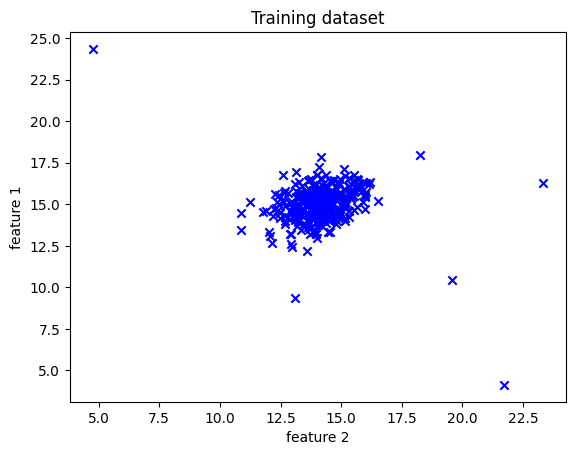

In [16]:
plt.scatter(
    X_train[:,0], X_train[:, 1], 
    marker = 'x', c = 'b'
)
plt.title('Training dataset')
plt.ylabel('feature 1')
plt.xlabel('feature 2')


In [17]:
"""
Estimating parameters for a Gaussian distribution
for each of the features $x_{i}$
""";
def estimate_gaussian(X): 
    """
    Calculates mean and variance of all features 
    in the dataset
    
    Args:
        X (ndarray): (m, n) Data matrix
    
    Returns:
        mu (ndarray): (n,) Mean of all features
        var (ndarray): (n,) Variance of all features
    """

    m, n = X.shape
    
    ### START CODE HERE ### 
    mu = X.mean(axis=0)
    var = X.std(axis=0)**2
    
    
    ### END CODE HERE ### 
        
    return mu, var

mu, var = estimate_gaussian(X_train)              

print("Mean of each feature:", mu)
print("Variance of each feature:", var)


Mean of each feature: [14.11222578 14.99771051]
Variance of each feature: [1.83263141 1.70974533]


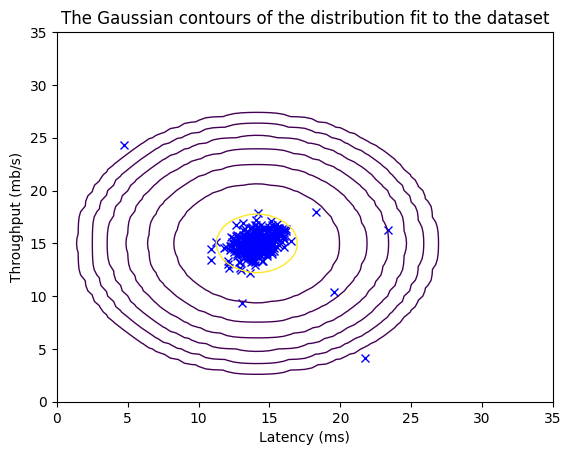

In [18]:
def multivariate_gaussian(X, mu, var):
    """
    Computes the probability 
    density function of the examples X under the multivariate gaussian 
    distribution with parameters mu and var. If var is a matrix, it is
    treated as the covariance matrix. If var is a vector, it is treated
    as the var values of the variances in each dimension (a diagonal
    covariance matrix
    """
    
    k = len(mu)
    
    if var.ndim == 1:
        var = np.diag(var)
        
    X = X - mu
    p = (2* np.pi)**(-k/2) * np.linalg.det(var)**(-0.5) * \
        np.exp(-0.5 * np.sum(np.matmul(X, np.linalg.pinv(var)) * X, axis=1))
    
    return p

def visualize_fit(X, mu, var):
    """
    This visualization shows you the 
    probability density function of the Gaussian distribution. Each example
    has a location (x1, x2) that depends on its feature values.
    """
    
    X1, X2 = np.meshgrid(np.arange(0, 35.5, 0.5), np.arange(0, 35.5, 0.5))
    Z = multivariate_gaussian(np.stack([X1.ravel(), X2.ravel()], axis=1), mu, var)
    Z = Z.reshape(X1.shape)

    plt.plot(X[:, 0], X[:, 1], 'bx')

    if np.sum(np.isinf(Z)) == 0:
        plt.contour(X1, X2, Z, levels=10**(np.arange(-20., 1, 3)), linewidths=1)
        
    # Set the title
    plt.title("The Gaussian contours of the distribution fit to the dataset")
    # Set the y-axis label
    plt.ylabel('Throughput (mb/s)')
    # Set the x-axis label
    plt.xlabel('Latency (ms)')


# Returns the density of the multivariate normal
# at each data point (row) of X_train
p = multivariate_gaussian(X_train, mu, var)

#Plotting code 
visualize_fit(X_train, mu, var)


In [22]:
"""
Select the threshold epsilon
"""

def select_threshold(y_val, p_val): 
    """
    Finds the best threshold to use for selecting outliers 
    based on the results from a validation set (p_val) 
    and the ground truth (y_val)
    
    Args:
        y_val (ndarray): Ground truth on validation set
        p_val (ndarray): Results on validation set
        
    Returns:
        epsilon (float): Threshold chosen 
        F1 (float):      F1 score by choosing epsilon as threshold
    """ 

    best_epsilon = 0
    best_F1 = 0
    F1 = 0
    
    step_size = (max(p_val) - min(p_val)) / 1000
    
    for epsilon in np.arange(min(p_val), max(p_val), step_size):
    
        ### START CODE HERE ### 
#         print(y_val)
#         print(epsilon)
#         print(p_val[0:5])
        p_val_bool = (p_val < epsilon).astype(int)
#         print(p_val_bool[0:5])
        tp = (y_val + p_val_bool == 2).astype(int).sum()
        fp = (y_val - p_val_bool == -1).astype(int).sum()
        fn = (y_val - p_val_bool == 1).astype(int).sum()
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        F1 = (2 * prec * rec) / (prec + rec)
        
        
        
        
        
        
        ### END CODE HERE ### 
        
        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
        
    return best_epsilon, best_F1


p_val = multivariate_gaussian(X_val, mu, var)
epsilon, F1 = select_threshold(y_val, p_val)

print('Best epsilon found using cross-validation: %e' % epsilon)
print('Best F1 on Cross Validation Set: %f' % F1)


Best epsilon found using cross-validation: 8.990853e-05
Best F1 on Cross Validation Set: 0.875000


C:\Users\evgen\AppData\Local\Temp\ipykernel_16604\2424755802.py:37: RuntimeWarning: invalid value encountered in scalar divide
  prec = tp / (tp + fp)


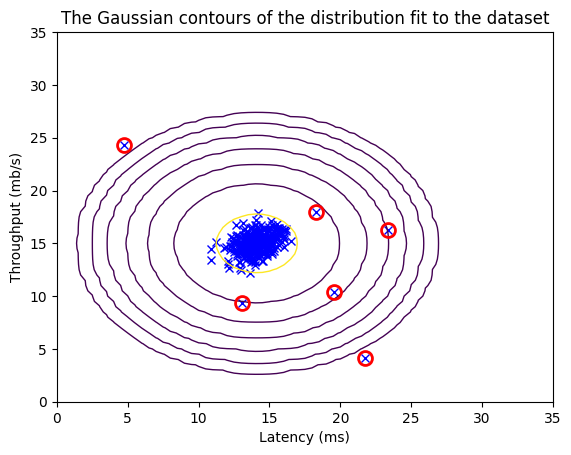

In [23]:
# Find the outliers in the training set 
outliers = p < epsilon

# Visualize the fit
visualize_fit(X_train, mu, var)

# Draw a red circle around those outliers
plt.plot(X_train[outliers, 0], X_train[outliers, 1], 'ro',
         markersize= 10,markerfacecolor='none', markeredgewidth=2)

# Recommender system

Recommender systems predict user preferences and recommend items or content of interest.

Types of models:
- Collaborative filtering
- Content-based filtering
- Hybrid models



## Collaborative filtering 

Recommend items to you based on ratings of users who gave similar ratings as you.

<img src="Media/ML/collaborative-filtering.png" width=850>

Then, we can recommend to existing users movies that they haven't watched yet, but will likely enjoy due to coinciding with interests of users who have similar interests.


## Content-based filtering

Recommend items to you based on features of user and features of item to find good match.


# Generative learning

## Midjourney

Make an image horisontal: `--ar 3:2`